In [1]:
# -*- coding: utf-8 -*-

# On importe les librairies dont on aura besoin pour ce tp
from __future__ import print_function

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm as cm
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import cluster, metrics, manifold
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

import matplotlib

# =============================================================================
# Après le mentorat de Thierry :
# Voir si les fonctions que j'ai prises sur kaggle ne sont pas de trop.
# Ne pas prendre en compte dans un premier temps les mots-clefs car trop nombreux.
# =============================================================================

# etudier l'impact des n premiers

# cleaner le dataset
# mettre les valeurs que je veux
# calculer les distances 

# pca
# variation du facteur  silhouette en fonction de nb de clusters
# sklearn.metrics.silhouette_score

# voir le r2 pour la correlation
# voir ave le scatter plot

# indice de popularité du film dans un deuxième temps pour départager ceux qui pourraient etre dans un meme cluster

In [3]:
# Lieu où se trouve le fichier
_FICHIER = 'C:\\Users\\Toni\\Desktop\\pas_synchro\\p3_bdd_clean_v2.csv'
_DOSSIERTRAVAIL = 'C:\\Users\\Toni\\python\\python\\Projet_3\\images'

In [35]:
def illustration(data, range_n_clusters):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    #print(__doc__)

    # Scale des données obligatoire avant la réduction des dimensions
    std_scale = preprocessing.StandardScaler().fit(data)
    X = std_scale.transform(data)
    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(36, 14)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
# =============================================================================
#         # 2nd Plot showing the actual clusters formed
#         colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                     c=colors, edgecolor='k')
#     
#         # Labeling the clusters
#         centers = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                     c="white", alpha=1, s=200, edgecolor='k')
#     
#         for i, c in enumerate(centers):
#             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                         s=50, edgecolor='k')
#     
#         ax2.set_title("The visualization of the clustered data.")
#         ax2.set_xlabel("Feature space for the 1st feature")
#         ax2.set_ylabel("Feature space for the 2nd feature")
# =============================================================================
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

def count_word(data, ref_col, liste):
    """
    TBD
    """
    keyword_count = dict()

    for word in liste:
        keyword_count[word] = 0

    for liste_keywords in data[ref_col].str.split('|'):
        if isinstance(liste_keywords, float) and pd.isnull(liste_keywords):
            continue
        for word in [word for word in liste_keywords if word in liste]:
            if pd.notnull(word):
                keyword_count[word] = keyword_count[word] + 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []

    for k, v in keyword_count.items():
        keyword_occurences.append([k, v])

    keyword_occurences.sort(key=lambda x: x[1], reverse=True)

    return keyword_occurences, keyword_count

def comptabiliser(data, valeur_cherchee):
    """
    TBD
    """
    # compter tous les genres différents
    listing = set()

    for word in data[valeur_cherchee].str.split('|').values:
        if isinstance(word, float):
            continue
        listing = listing.union(word)

    # compter le nombre d'occurence de ces genres
    listing_compte, dum = count_word(data, valeur_cherchee, listing)

    return listing_compte

def affichage_kmeans(datanum, vmin, vmax, step):

    listing = dict()
    distortions = []
    
    # Scale des données obligatoire avant la réduction des dimensions
    std_scale = preprocessing.StandardScaler().fit(datanum)
    X_scaled = std_scale.transform(datanum)
    
    # Réduction t-Sne
    #print("Computing t-SNE embedding")
    #tsne = manifold.TSNE(n_components=2, perplexity=50, n_iter=500)
    
    cluster_range = range(vmin,vmax+1, step)
    
    for i in cluster_range:
        # On fait i clusters avec les données scalées.
#        kmeans = KMeans(n_init=50,
#                        n_clusters=i,
#                        init="k-means++",
#                        max_iter=1000,
#                        verbose=0,
#                        algorithm="auto")

        kmeans = KMeans(n_clusters=i, random_state=10)

        kmeans.fit(X_scaled)
        # Nouvelle colonne avec les conclusions de kmeans
        datanum['labels'] = kmeans.labels_
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        #print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
        
        #distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
        distortions.append(kmeans.inertia_)
        listing[i] = silhouette_avg
    
    # Données du graphique du coude
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortions } )
    #print(clusters_df)
    
    # Graphique du coude
    plt.figure(figsize=(15, 15))
    plt.plot(cluster_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    fichier_save = _DOSSIERTRAVAIL + '\\' + 'coude' 
    plt.savefig(fichier_save, dpi=100)
    plt.show()
    
    return listing, clusters_df

def transpose_bool(data, colon, limite):
    
    # On supprime les #NA
    data[colon].fillna('vide', inplace=True)
    
    # énumaration des genres
    listing = comptabiliser(data, colon)

    p=0    
    for mot, compte in listing:
        if p<limite:
            data[mot] = pd.Series(((1 if mot in data[colon][i] else 0) for i in range(len(data[colon]))), index=data.index)
        else:
            return 0
        p=p+1
        
    # Suppression de la colonne "vide"
    #del data['vide']

def histogramme(data, colon):
    """
        Note : La première colonne et la dernière ont un " caché
    """

    #fichier_save = _DOSSIERTRAVAIL + '\\' + 'histogram_' + colon

    #steps = (max(data[colon])-min(data[colon]))/100
    #bin_values = np.arange(start=min(data[colon]), stop=max(data[colon]), step=steps)
    plt.figure(figsize=(10, 6))
    plt.xlabel('Valeurs')
    plt.ylabel('Décompte')
    titre = 'Histogramme ' + colon
    plt.title(titre)
    # plt.hist(data[colon], bins=bin_values)
    # Test sans les valeurs NaN
    plt.hist(data[colon][np.isfinite(data[colon])], bins=100)
    #plt.savefig(fichier_save, dpi=100)
    plt.show()

def tester_moteur(datanum, titre):
    print(datanum['labels'][datanum['movie_title'].str.contains(titre)])
    print(datanum['movie_title'][datanum['movie_title'].str.contains(titre)])

def test(data):
    
    import seaborn as sn
    from sklearn.preprocessing import StandardScaler
        
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
    sn.clustermap(X_scaled, cmap=cmap, linewidths=.5)

def trouver_films_nom(data, titre):
    
    # liste_films = []
    
    label = int(data['labels'][data['movie_title'].replace({'\xa0': ''}, regex=True) == titre])
    
    print(data['movie_title'][data['labels'] == label])
    #print(data['movie_title'].where(data['labels'] == label))
    
    # Tentatives de conversion de chaines de caractères
    # p=data.where(data['director_name'] == 'James Cameron')
    # p=p.where(p['movie_title'] == 'The Terminator')
    # x=data['movie_title'].replace({'\xa0': ''}, regex=True)

def trouver_films_id(data, film_id):
    
    # liste_films = []
    label = data.index(film_id)
    
    print(data['movie_title'][data['labels'] == label])

In [5]:
 # On charge le dataset
data = pd.read_csv(_FICHIER, encoding = "ISO-8859-1")
del data['Unnamed: 0']

datanum = data.copy()
datanum.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4870.000000,4904.000000,4817.000000,4896.000000,4912.000000,4.919000e+03,4.919000e+03,4919.000000,4906.000000,4898.000000,4.434000e+03,4813.000000,4906.000000,4919.000000,4593.000000,4919.000000
mean,138.010267,107.089111,690.705418,630.961397,6490.875814,4.363525e+07,8.261820e+04,9574.645863,1.376478,267.603512,3.928822e+07,2002.445045,1621.071545,6.437874,2.222105,7345.293556
std,120.253857,25.278583,2832.107042,1625.428769,15103.081835,6.204814e+07,1.382858e+05,18159.992290,2.023493,372.839155,2.085579e+08,12.453460,4010.222585,1.127606,1.402514,19200.708189
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,8.050985e+06,8.356500e+03,1394.000000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,365.500000,982.000000,2.160712e+07,3.315800e+04,3044.000000,1.000000,153.500000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,160.000000
75%,191.000000,118.000000,190.000000,633.000000,11000.000000,5.205624e+07,9.375750e+04,13611.500000,2.000000,320.000000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# Données manquantes
missing_data = datanum.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data['filling_factor'] = (datanum.shape[0]-missing_data['missing_count'])/datanum.shape[0]*100
missing_data.sort_values('filling_factor').reset_index(drop=True)

,column_name,missing_count,filling_factor
0,budget,485,90.140272
1,aspect_ratio,326,93.372637
2,content_rating,301,93.880870
3,plot_keywords,152,96.909941
4,title_year,106,97.845090
5,director_facebook_likes,102,97.926408
6,director_name,102,97.926408
7,num_critic_for_reviews,49,99.003863
8,actor_3_facebook_likes,23,99.532425
9,actor_3_name,23,99.532425


In [7]:
#transpose_bool(datanum, 'language', 50)
#transpose_bool(datanum, 'country')    
transpose_bool(datanum, 'genres', 50)
transpose_bool(datanum, 'plot_keywords', 50)
transpose_bool(datanum, 'color', 50)
transpose_bool(datanum, 'content_rating', 50)
transpose_bool(datanum, 'director_name', 50)
transpose_bool(datanum, 'actor_1_name', 50)
transpose_bool(datanum, 'actor_2_name', 50)
transpose_bool(datanum, 'actor_3_name', 50)

# Suppression de la colonne "vide"
#del datanames['vide']

0

In [8]:
# Suprresion de ce qui n'est pas chiffré
datanum = datanum.drop(['color', 'director_name', 'actor_1_name', 'genres', 'movie_title', 'actor_2_name', 'actor_3_name'], axis=1)
datanum = datanum.drop(['plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis=1)

# Suprresion de ce qui n'est pas chiffré #2
datanum = datanum.drop(['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes'], axis=1)
datanum = datanum.drop(['num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes'], axis=1)
datanum = datanum.drop(['aspect_ratio', 'num_voted_users', 'cast_total_facebook_likes'], axis=1)

In [10]:
datanum.fillna(0, inplace=True)

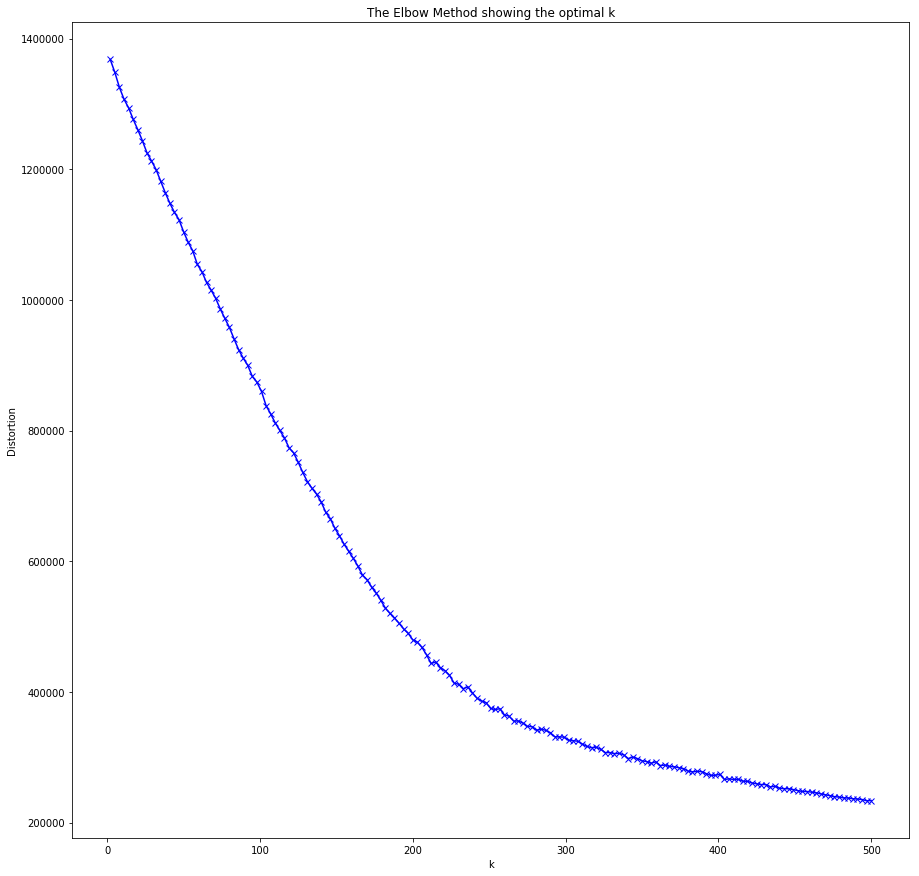

In [11]:
# Coude
res, dico = affichage_kmeans(datanum, 2, 500, 3)

For n_clusters = 150 The average silhouette_score is : 0.106210346192


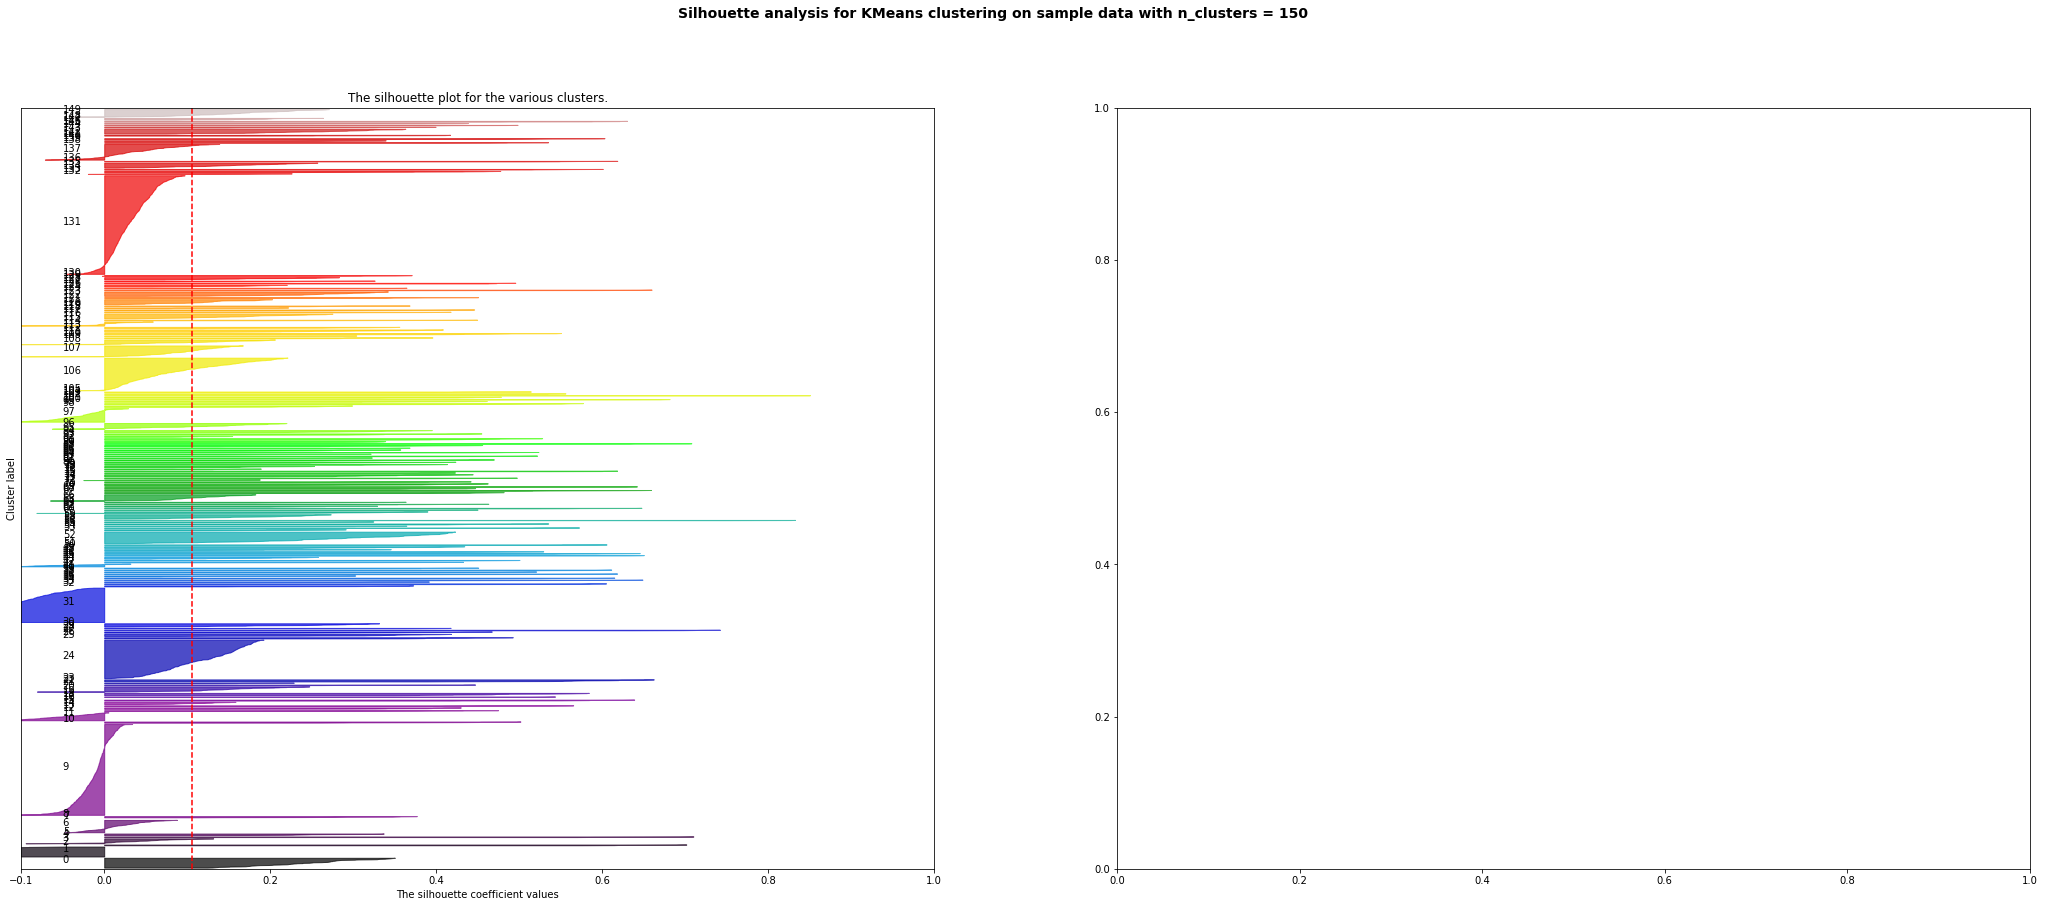

For n_clusters = 152 The average silhouette_score is : 0.100494677147


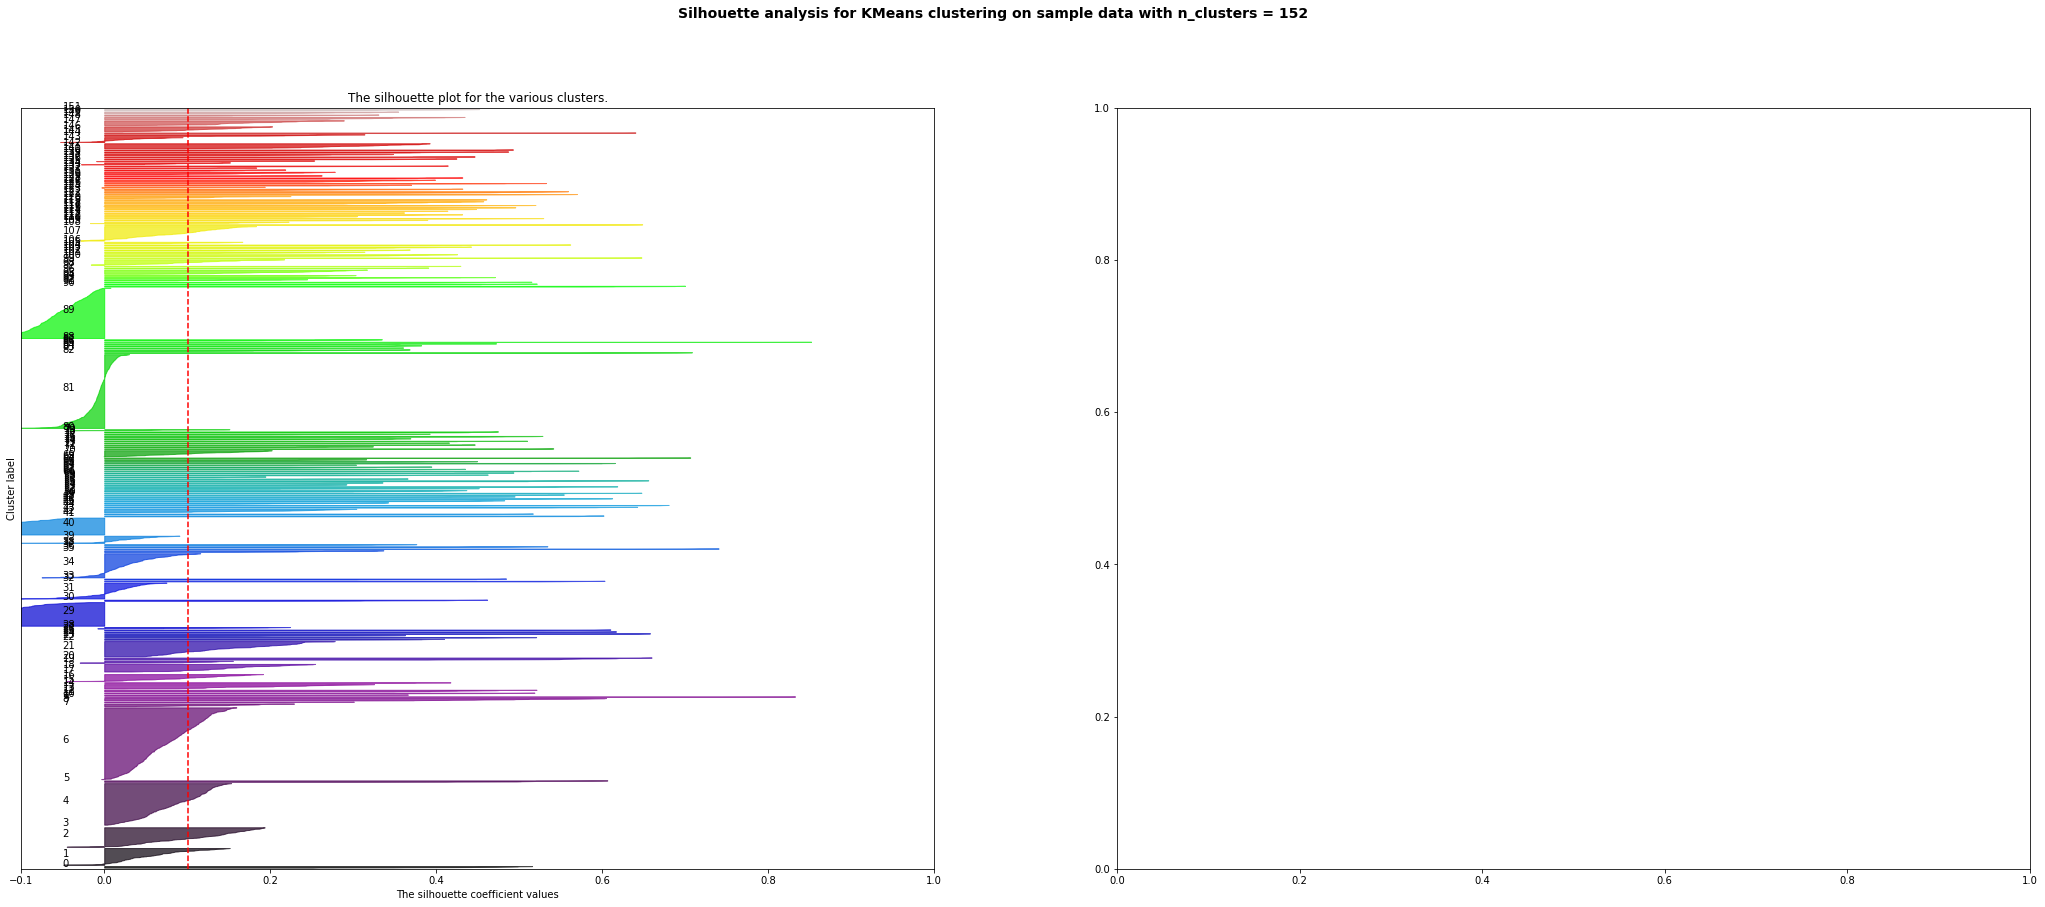

For n_clusters = 154 The average silhouette_score is : 0.120856134241


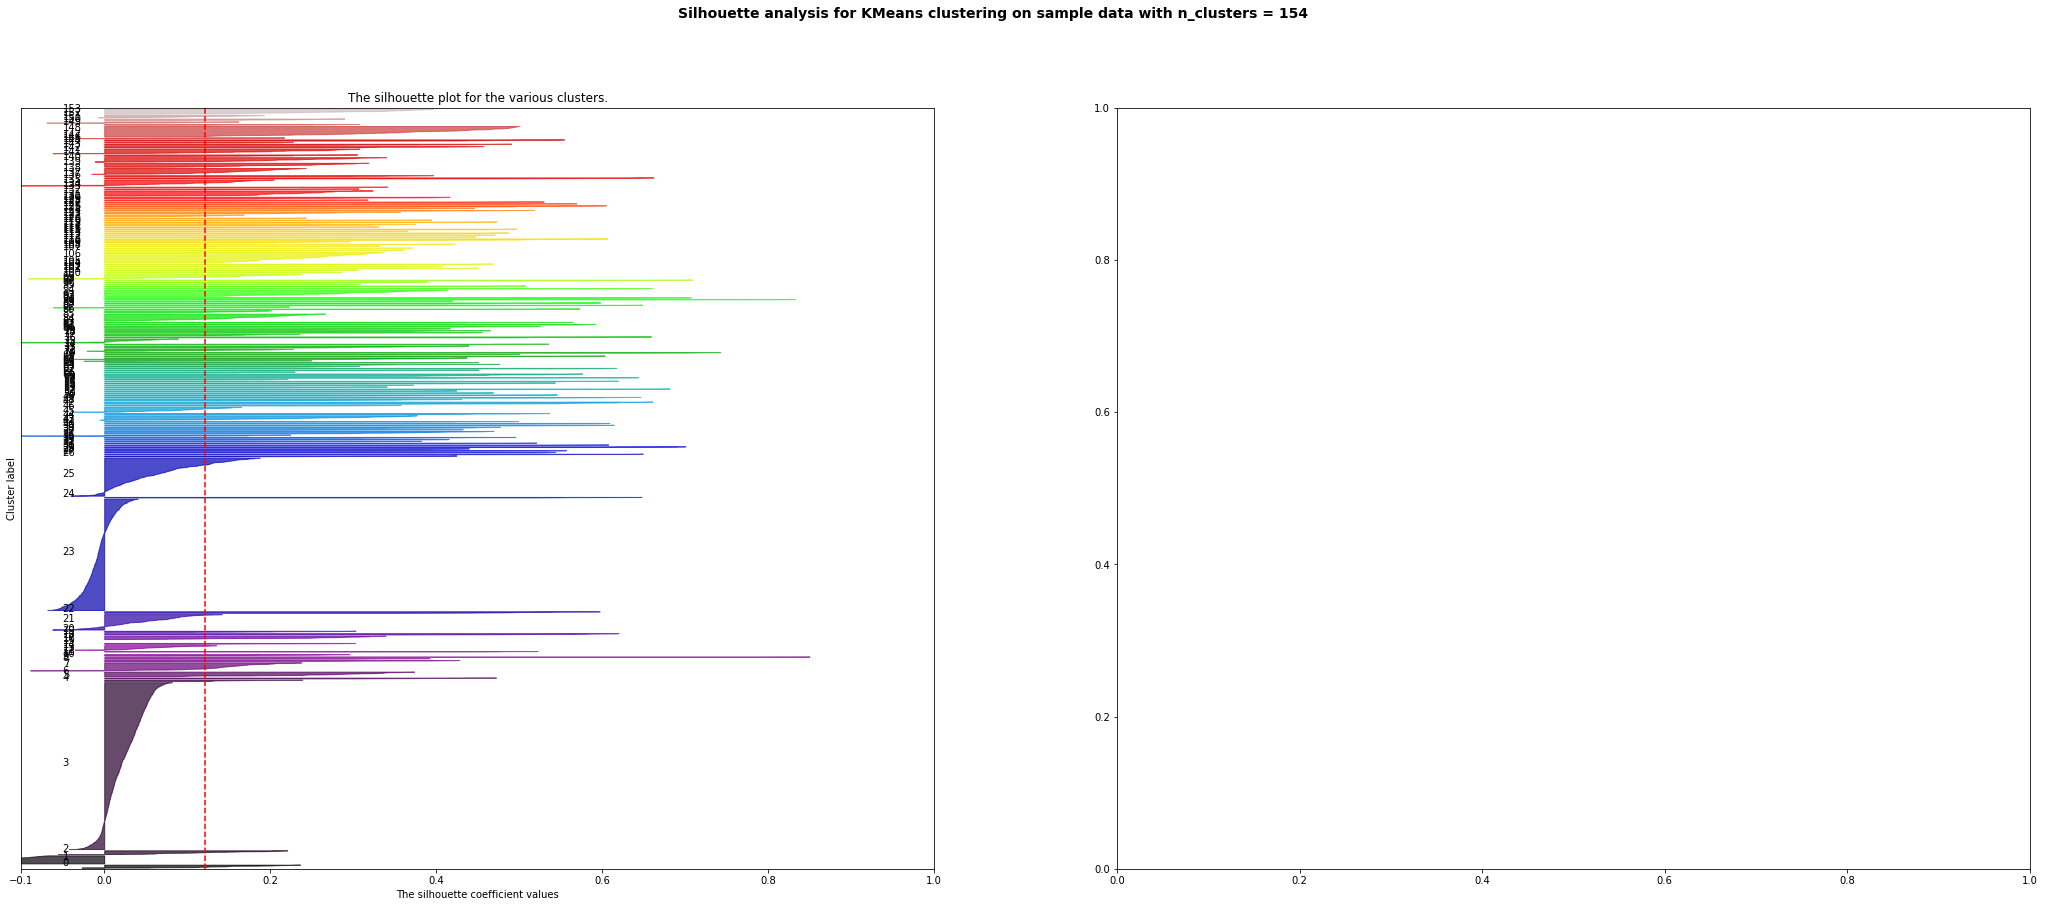

For n_clusters = 156 The average silhouette_score is : 0.110982622663


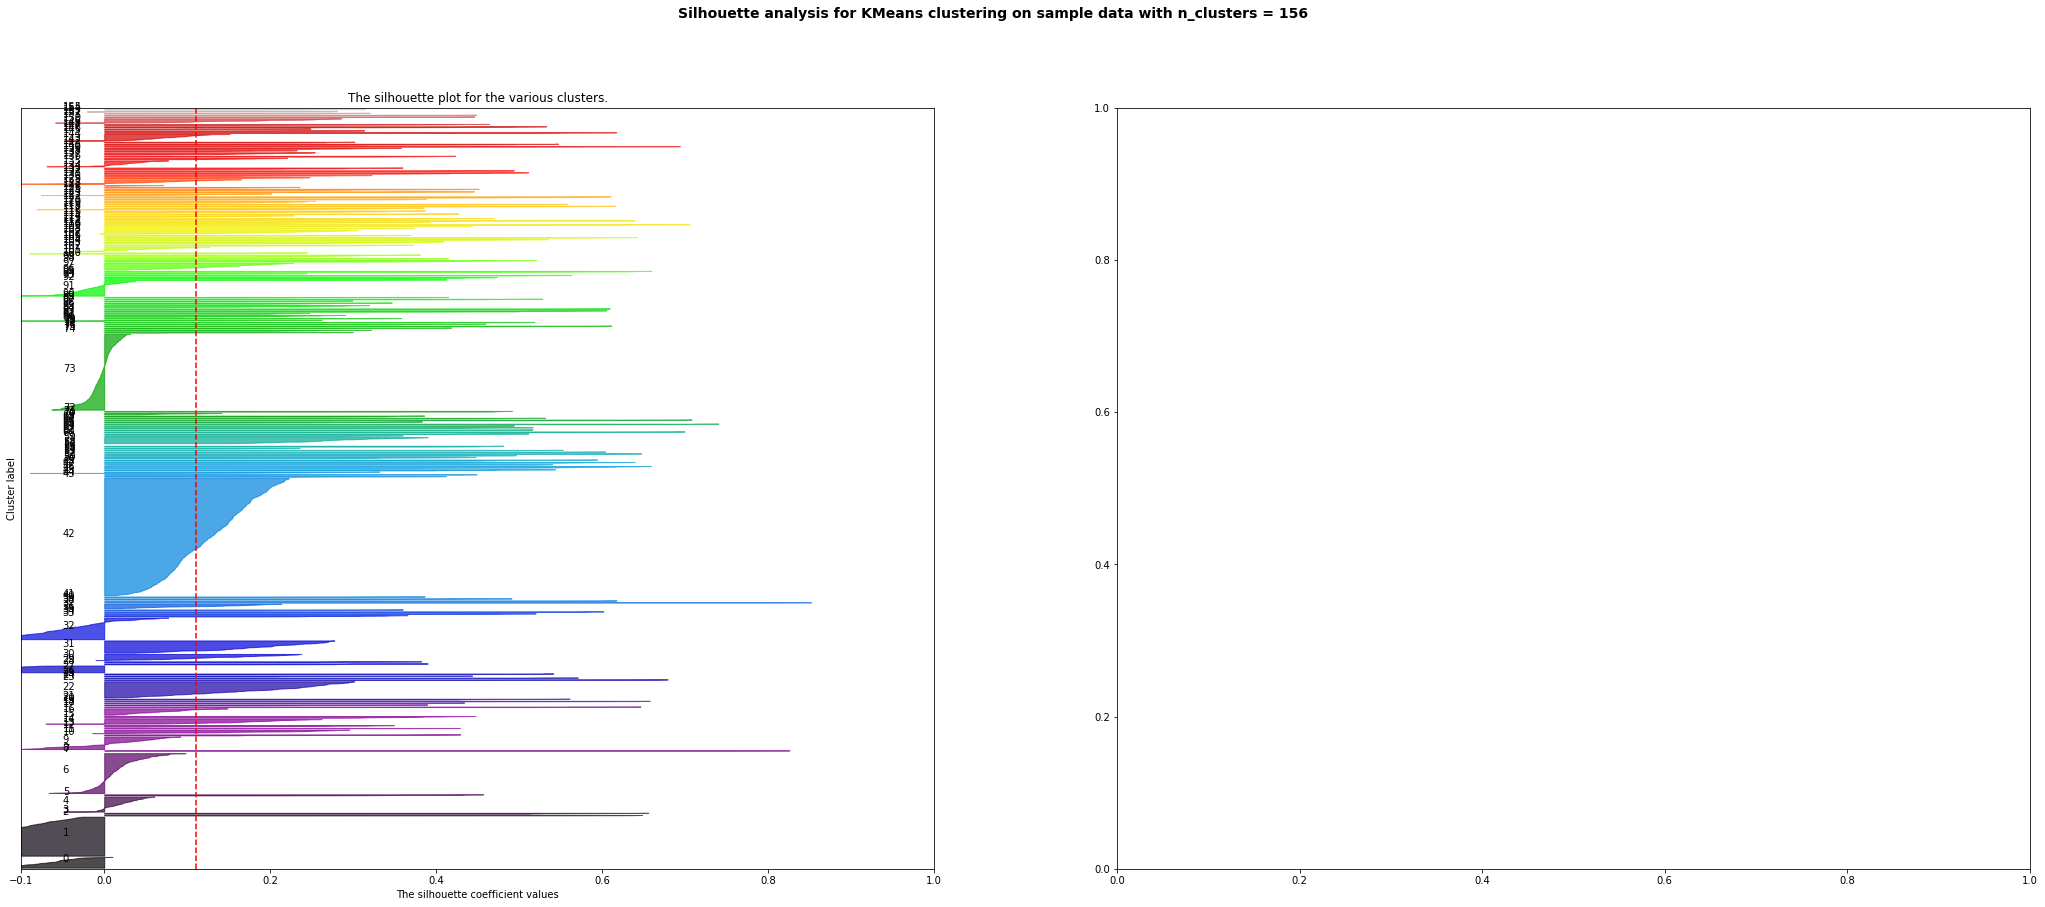

For n_clusters = 158 The average silhouette_score is : 0.114389566912


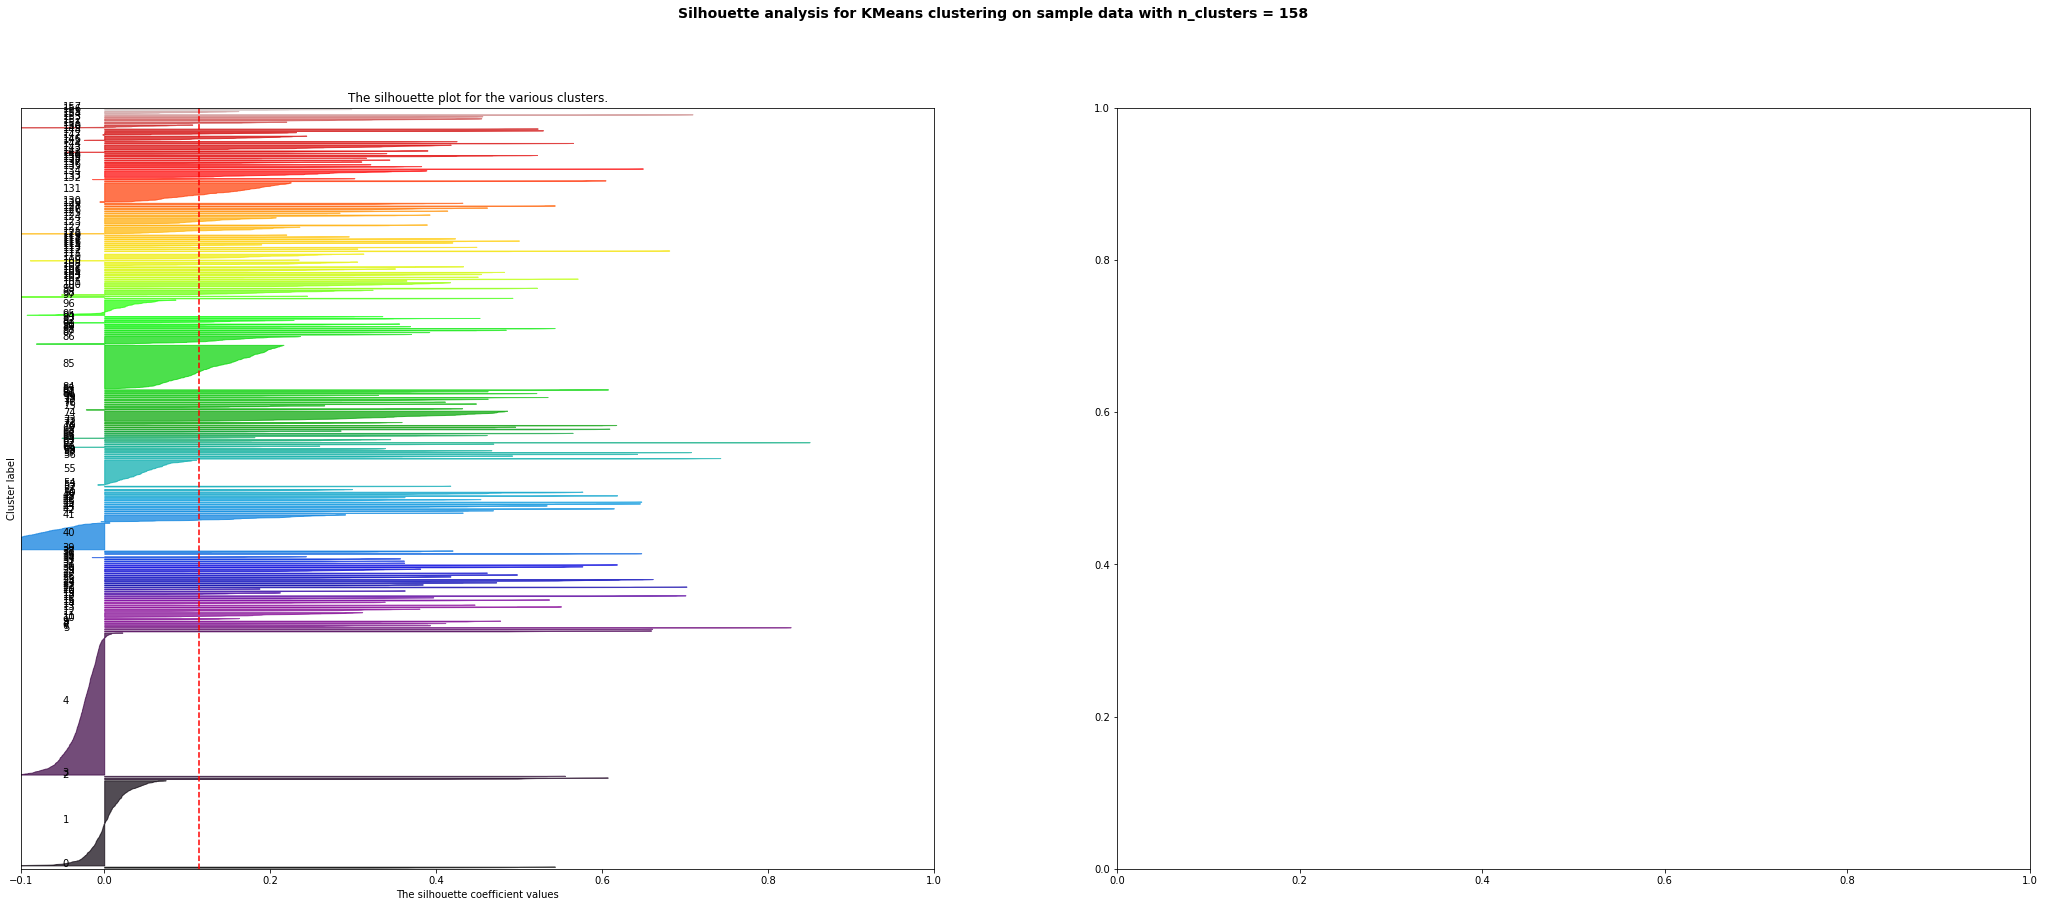

For n_clusters = 160 The average silhouette_score is : 0.112732938592


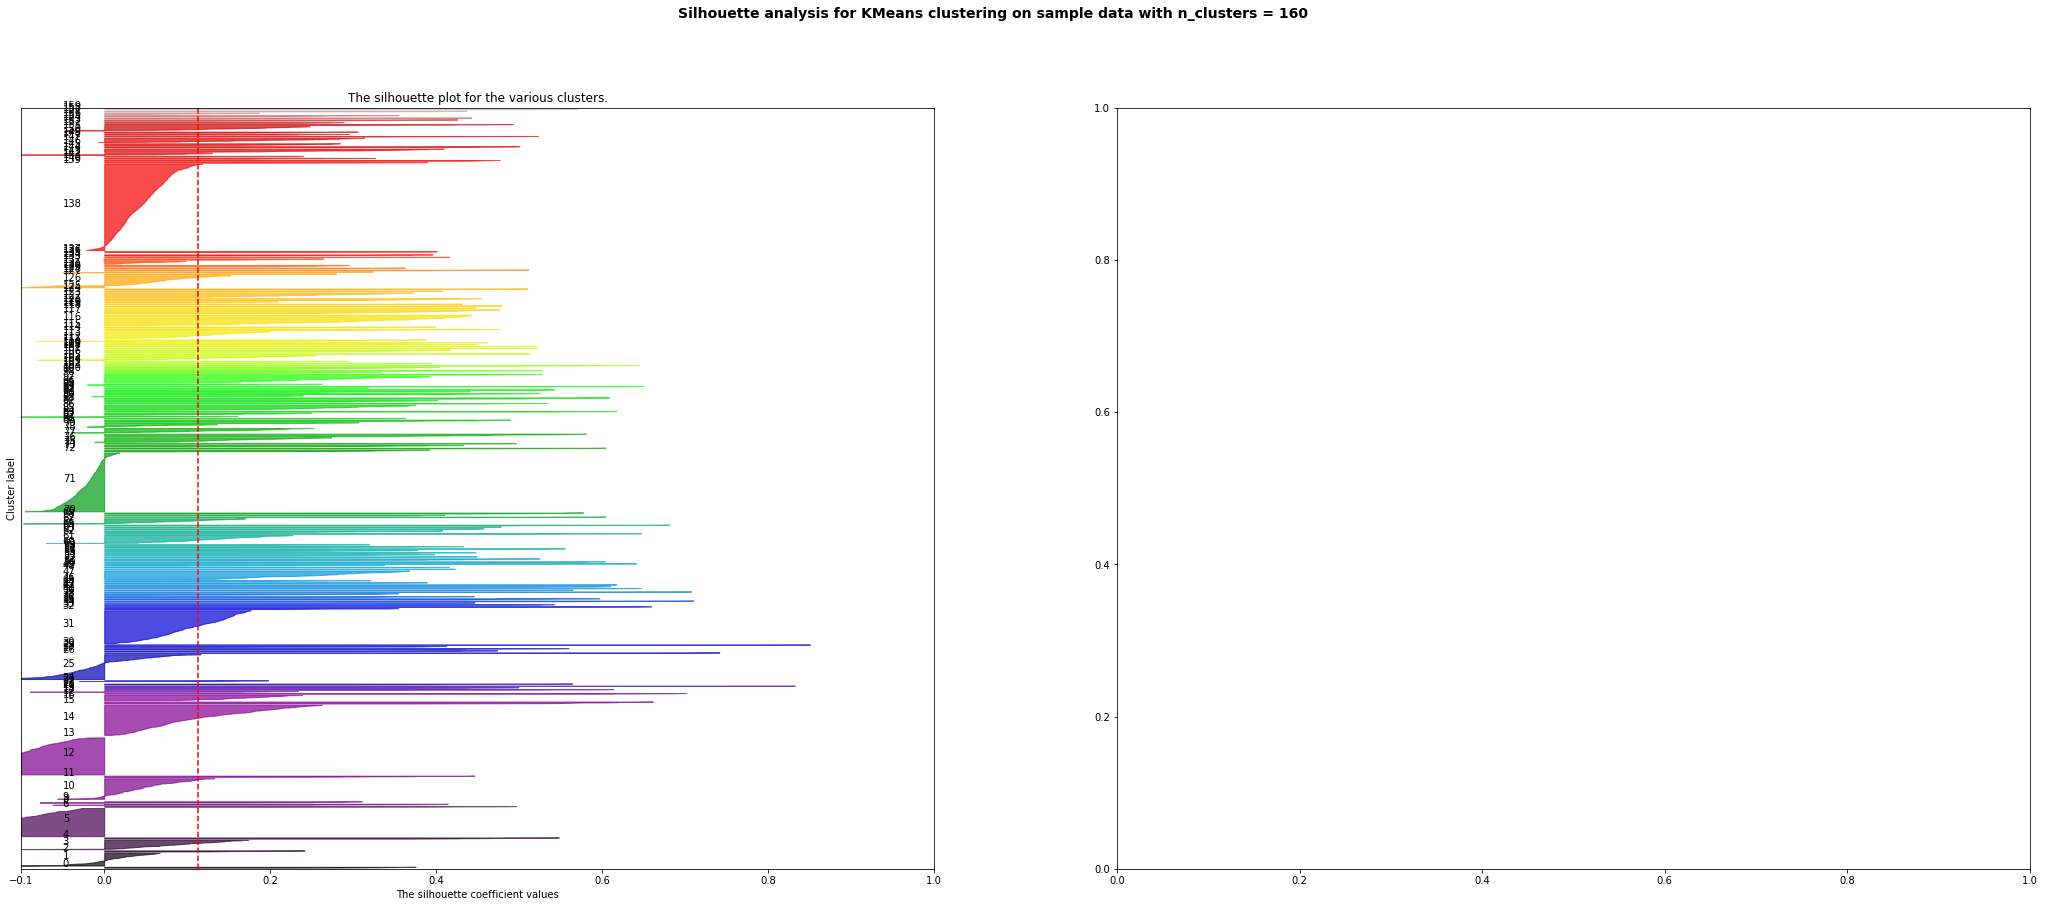

For n_clusters = 162 The average silhouette_score is : 0.123032285716


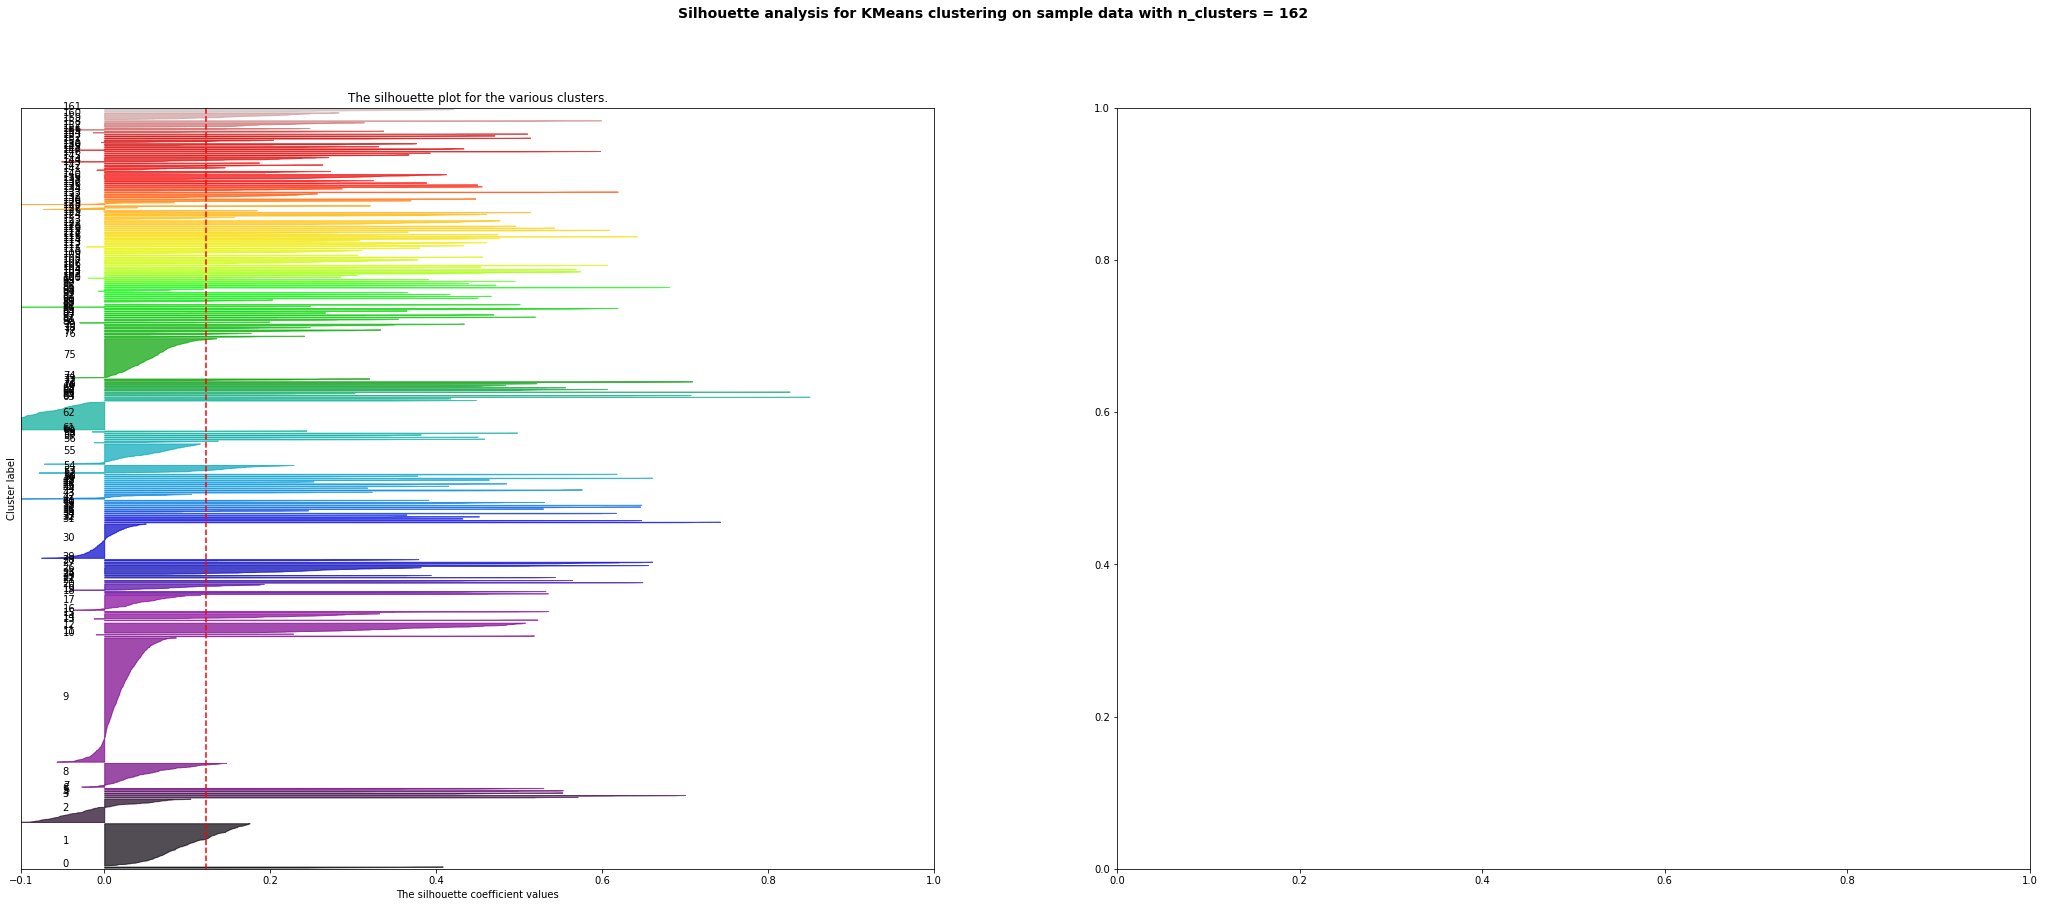

For n_clusters = 164 The average silhouette_score is : 0.121248705347


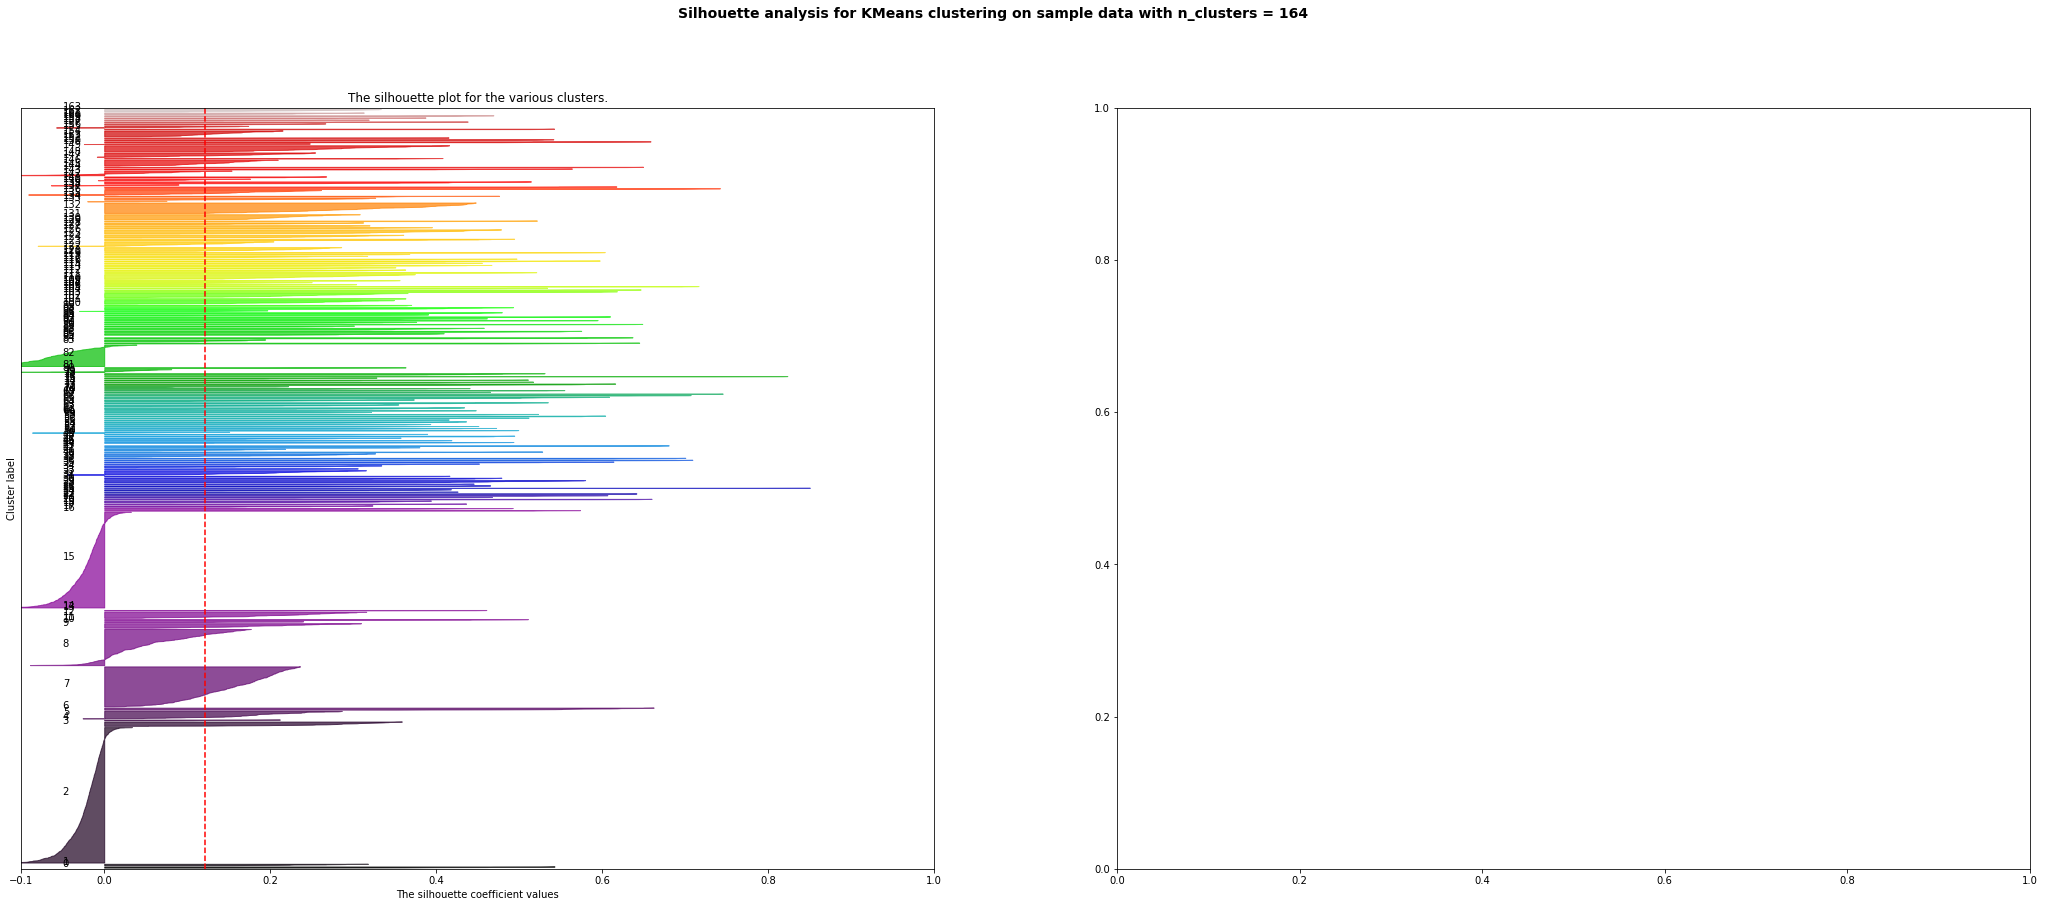

For n_clusters = 166 The average silhouette_score is : 0.109088218682


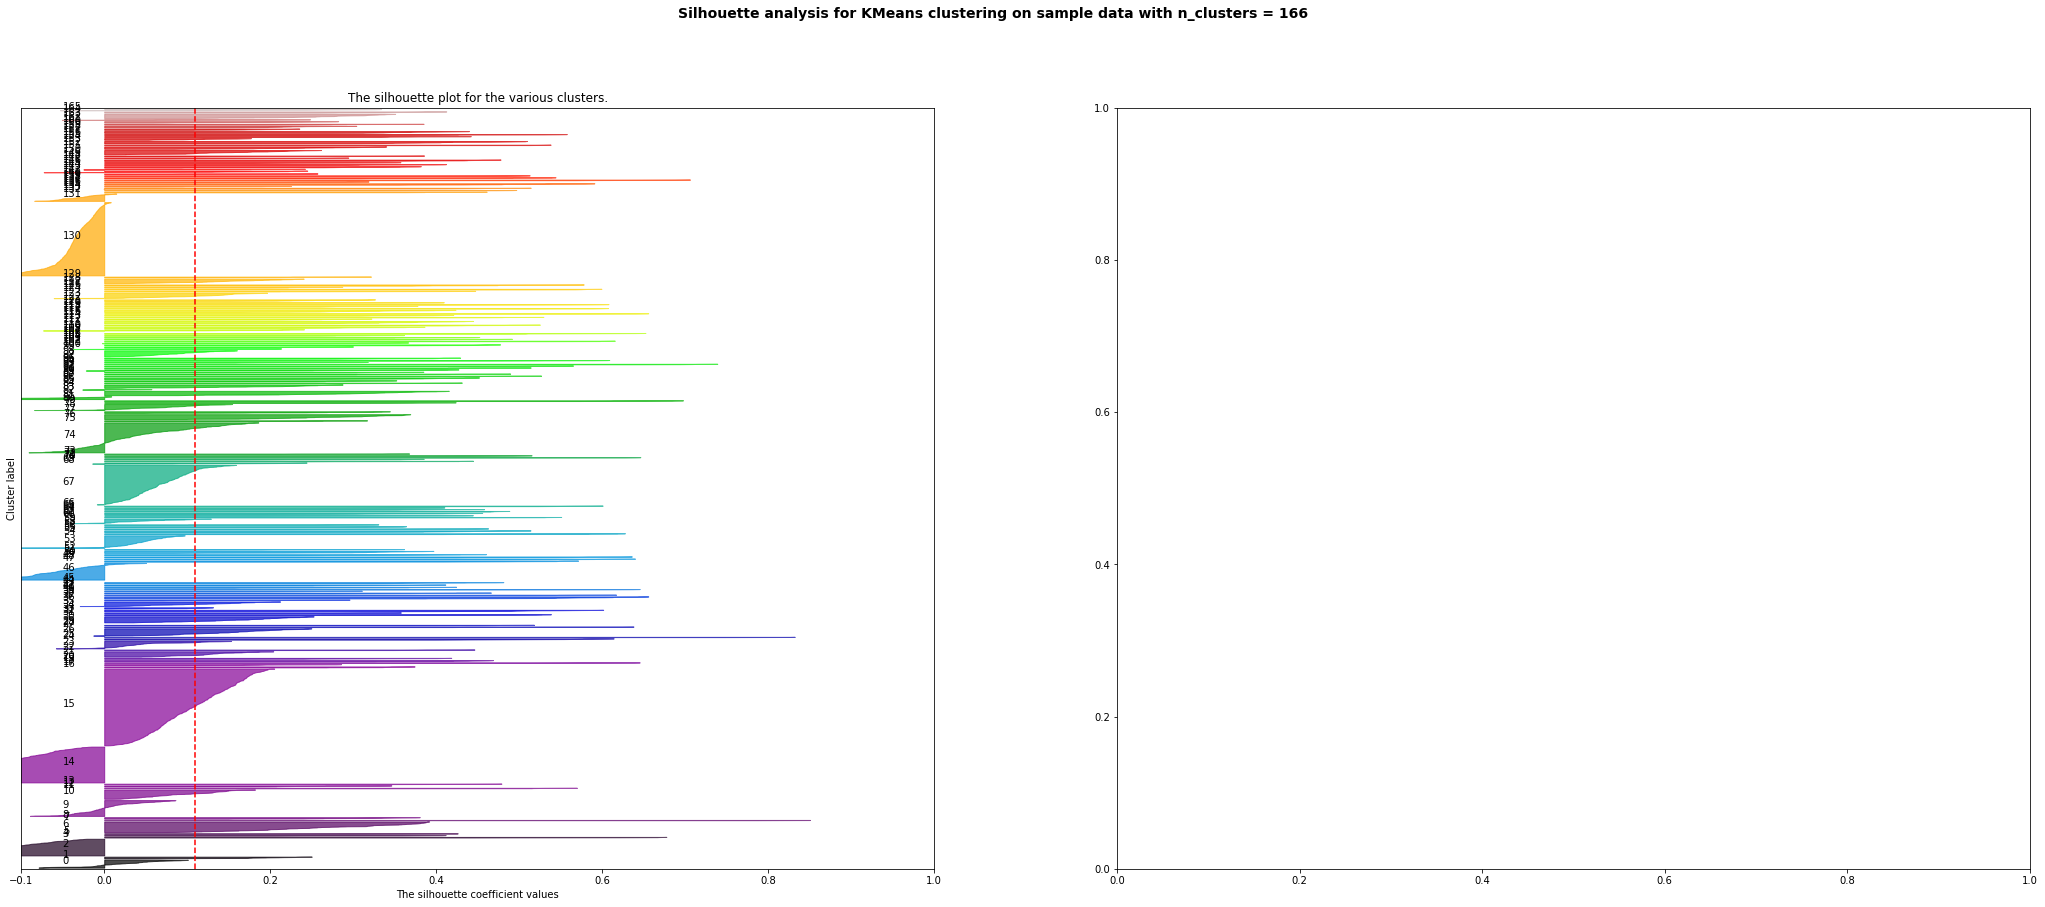

For n_clusters = 168 The average silhouette_score is : 0.0936838181917


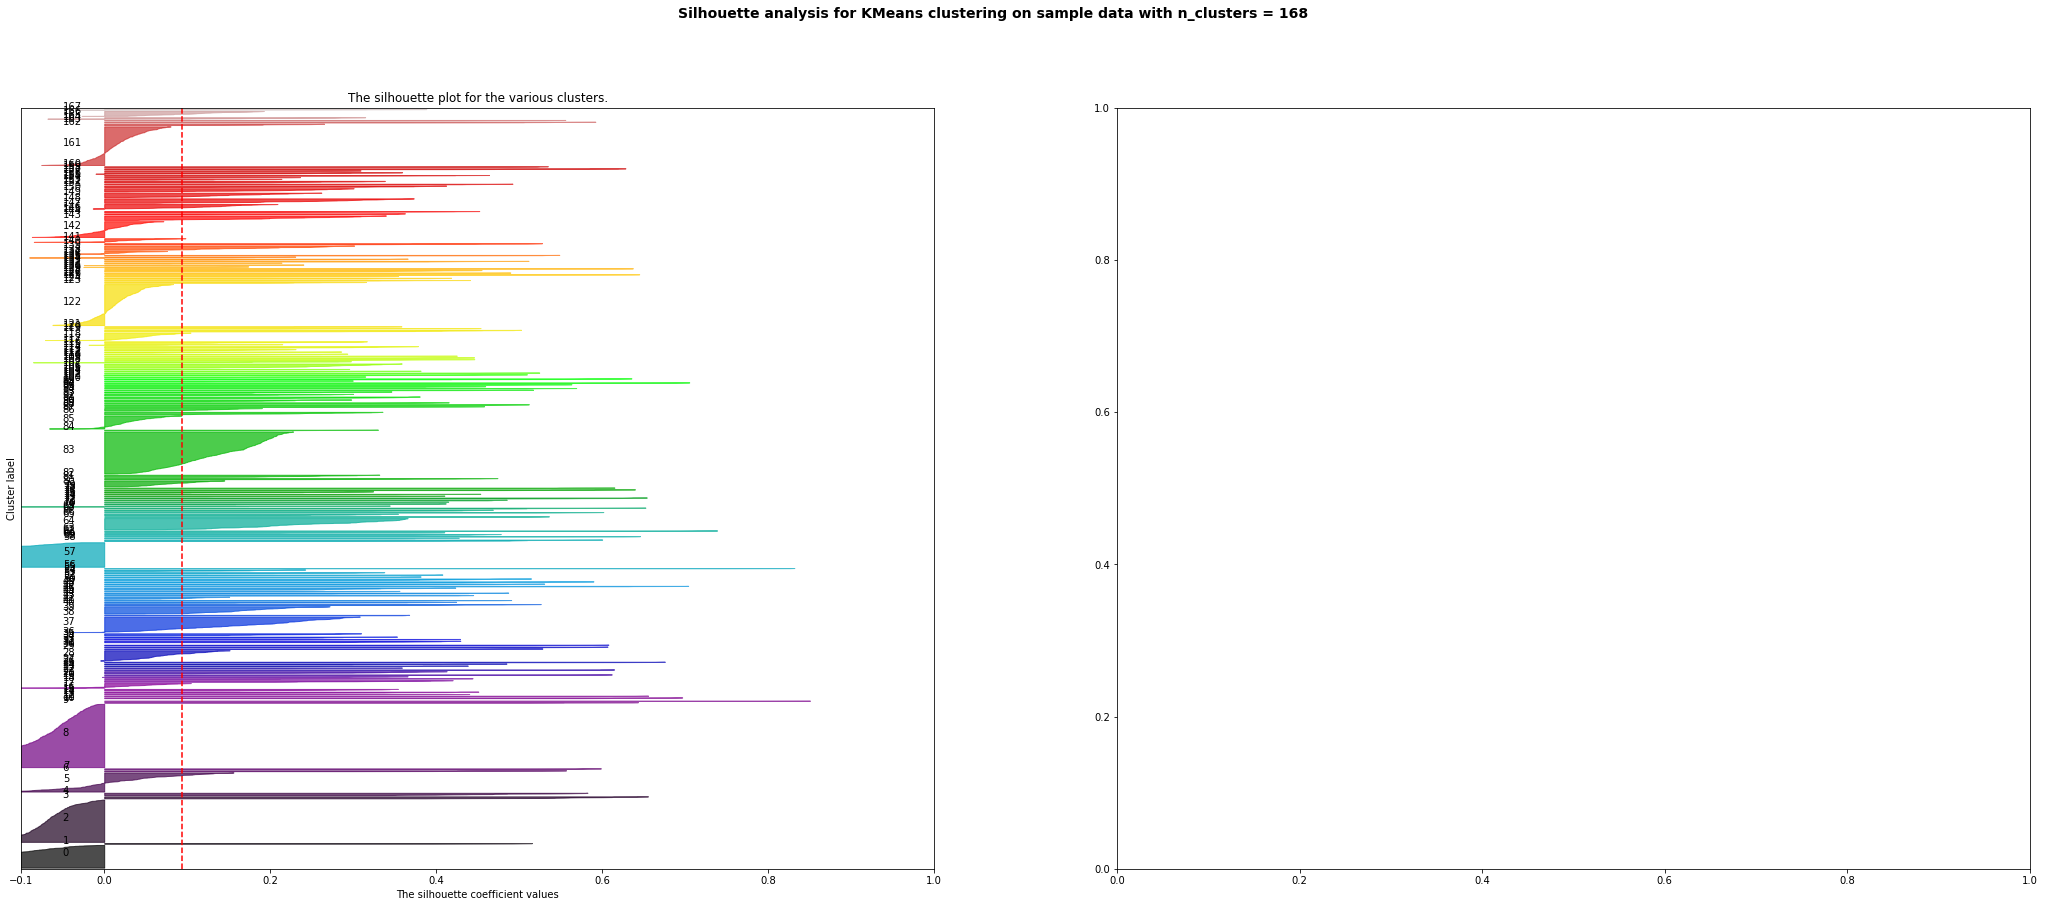

For n_clusters = 170 The average silhouette_score is : 0.129899660903


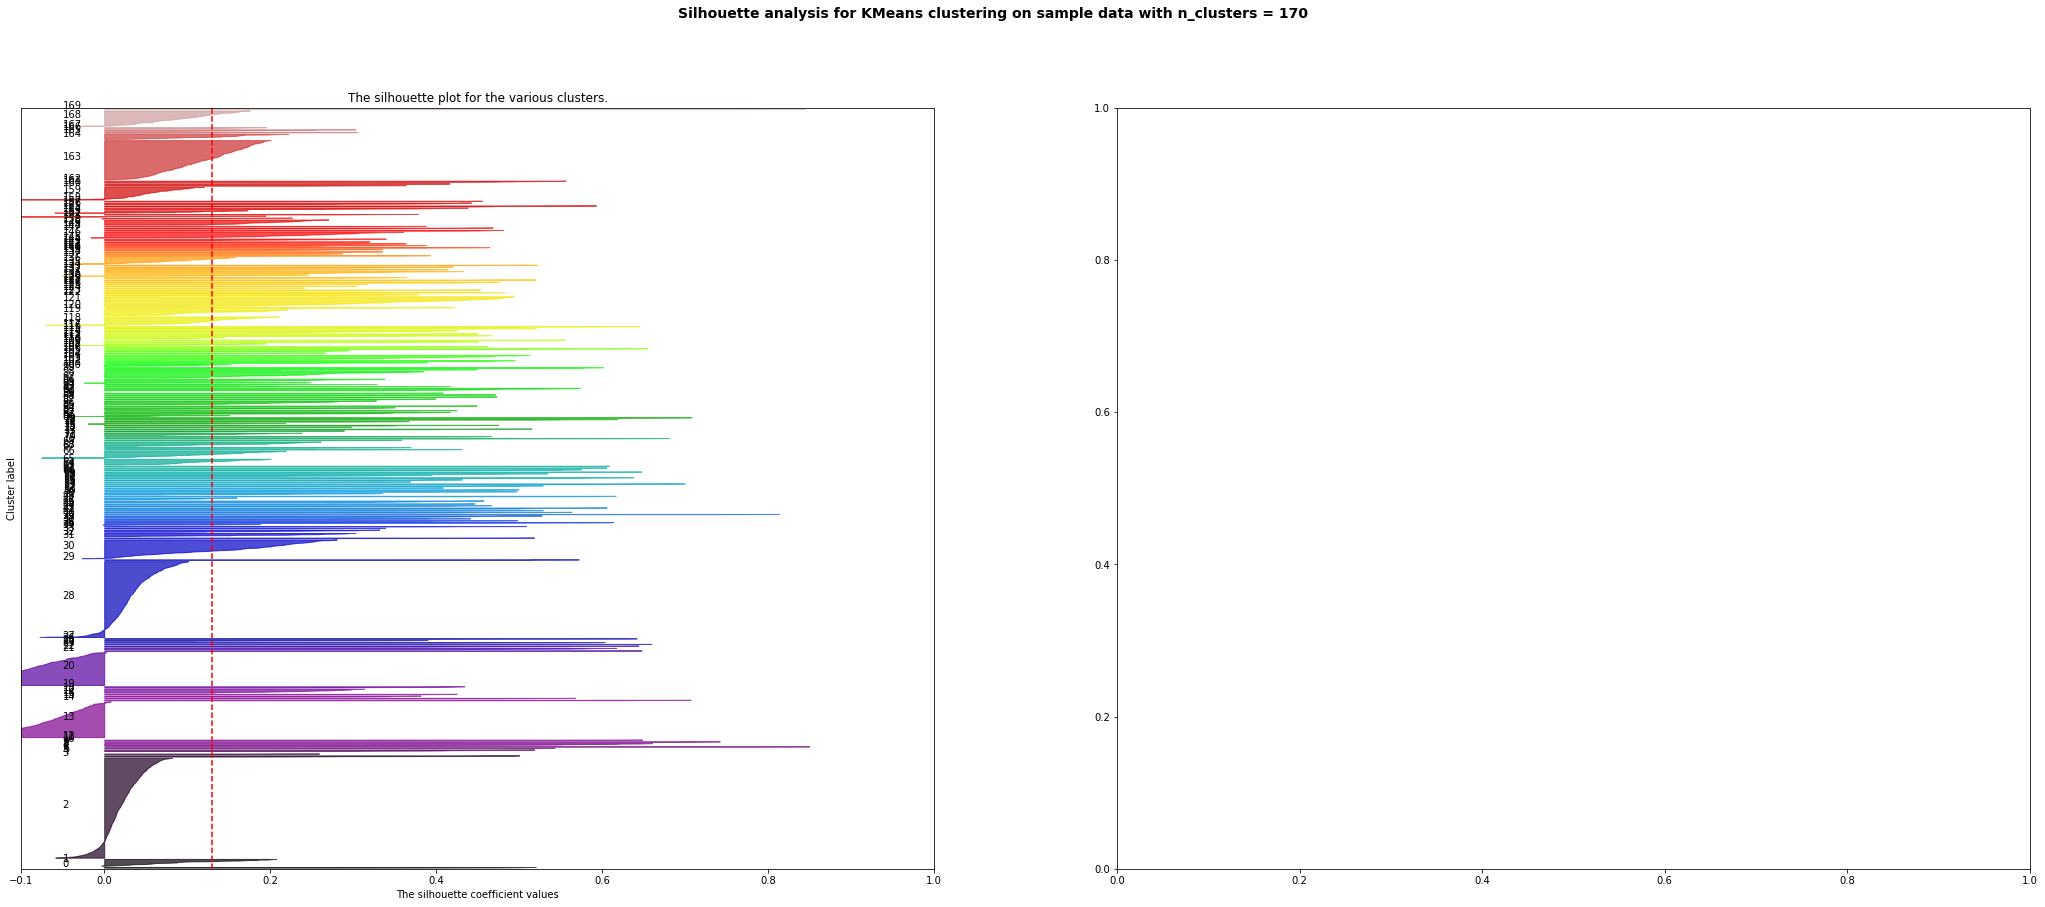

For n_clusters = 172 The average silhouette_score is : 0.121420952714


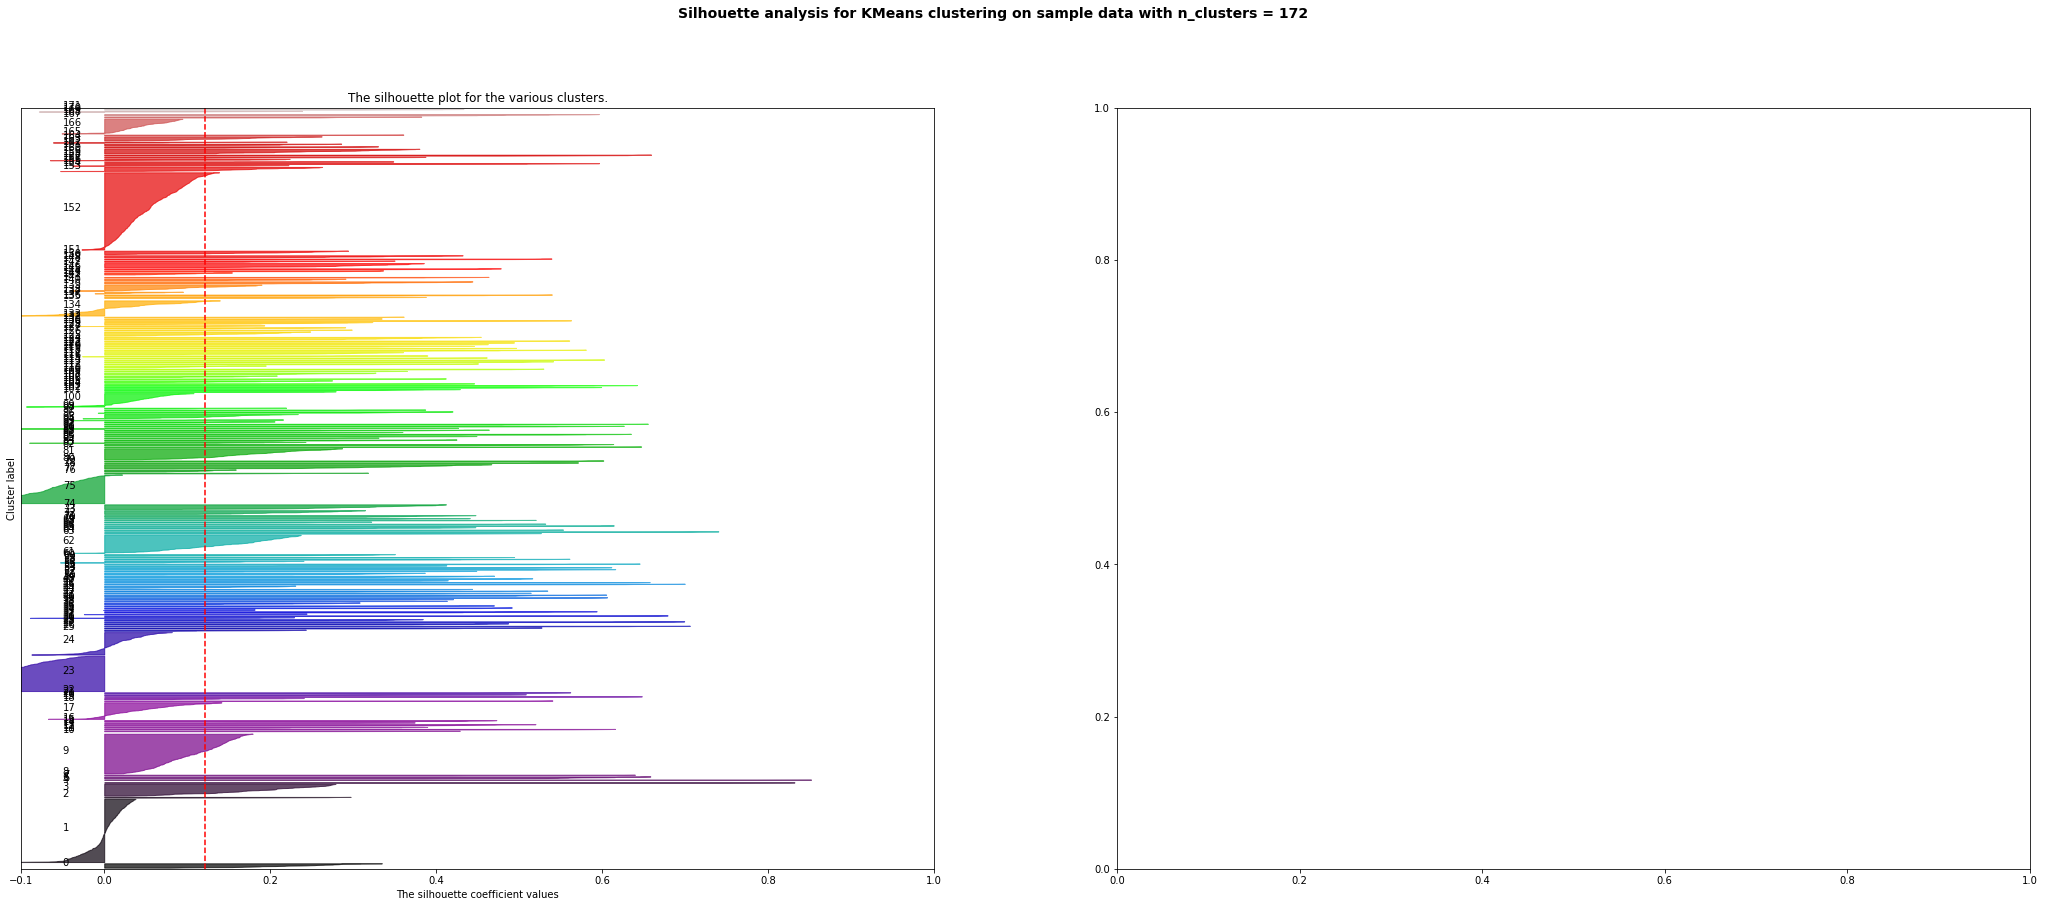

For n_clusters = 174 The average silhouette_score is : 0.121405931289


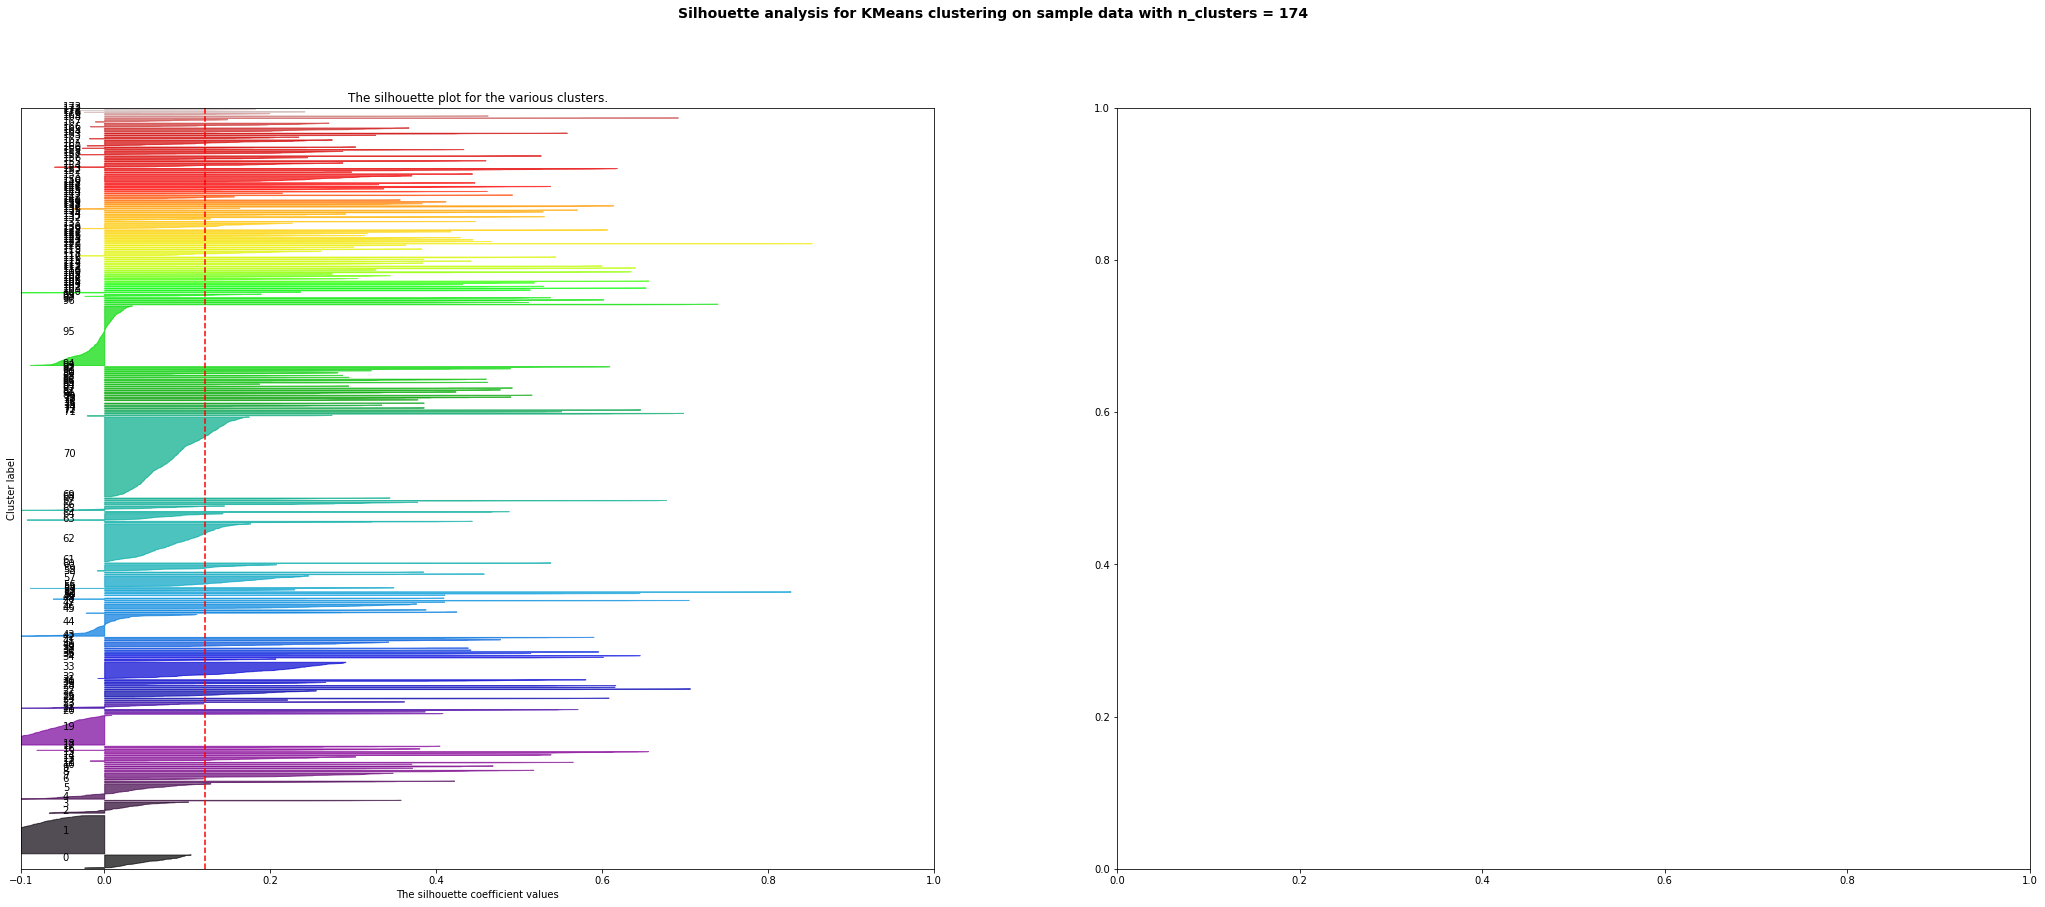

For n_clusters = 176 The average silhouette_score is : 0.124010216768


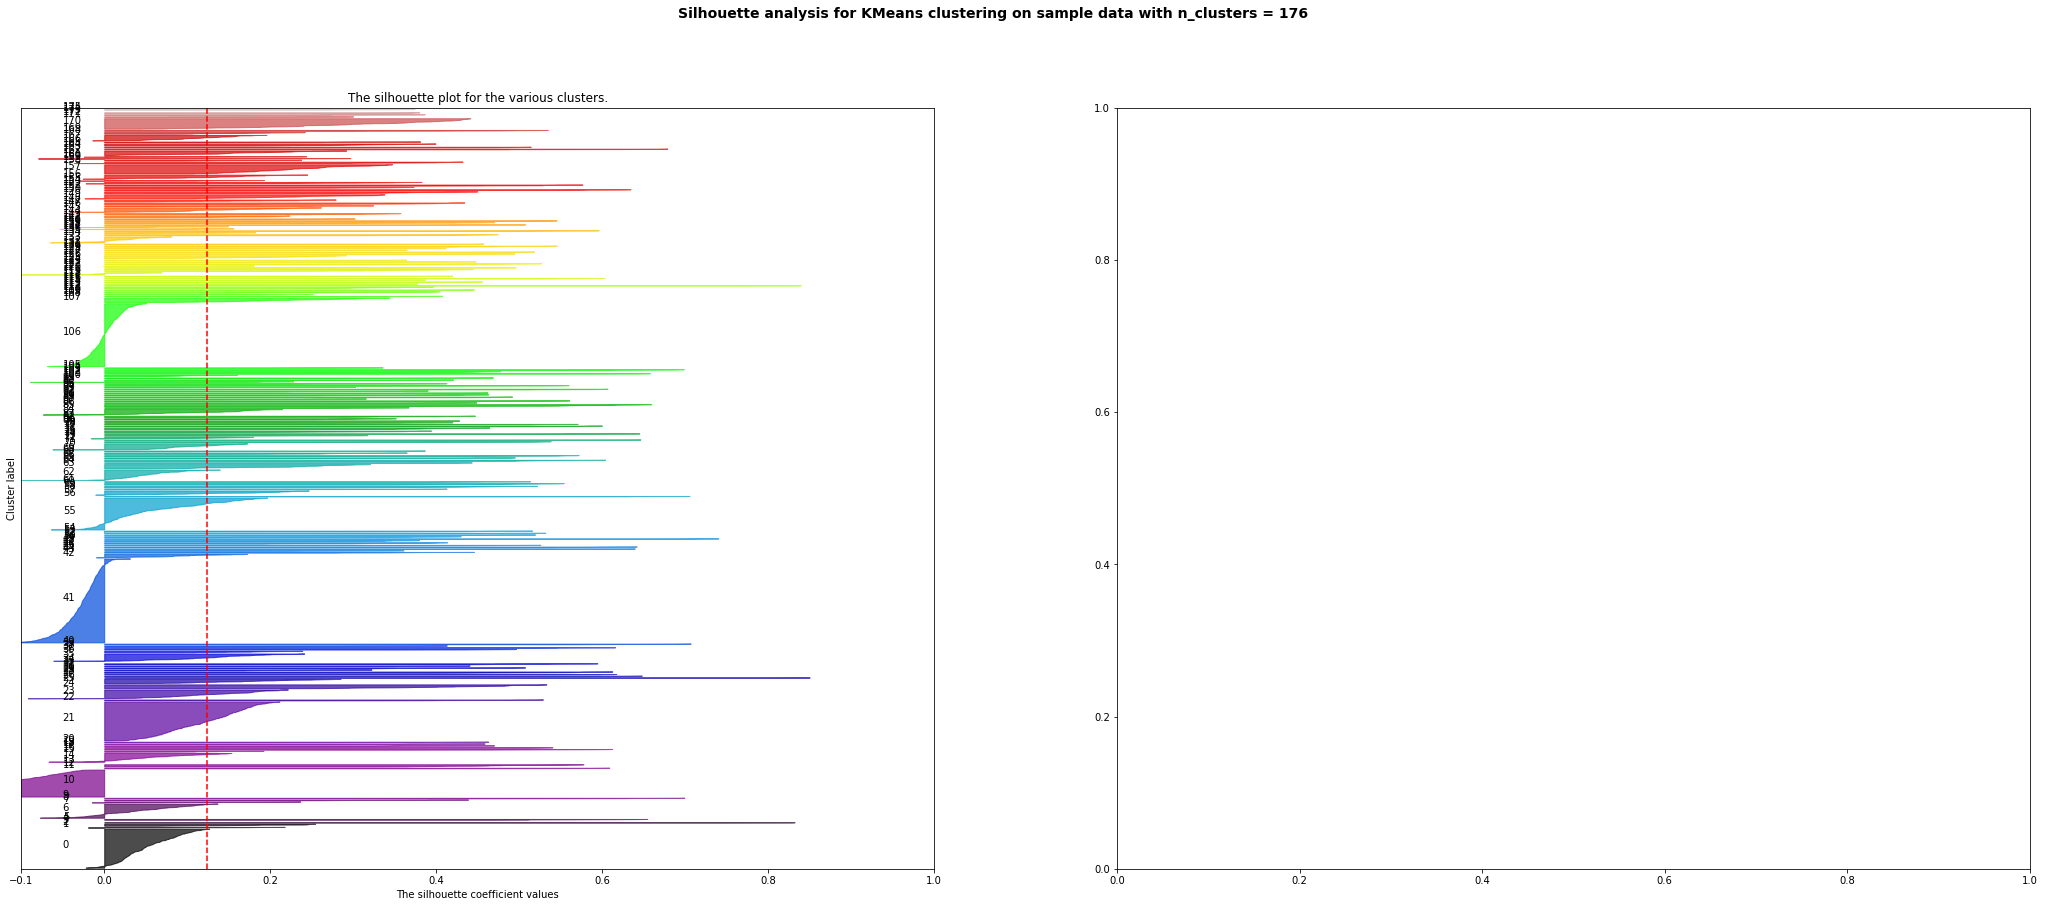

For n_clusters = 178 The average silhouette_score is : 0.13465703746


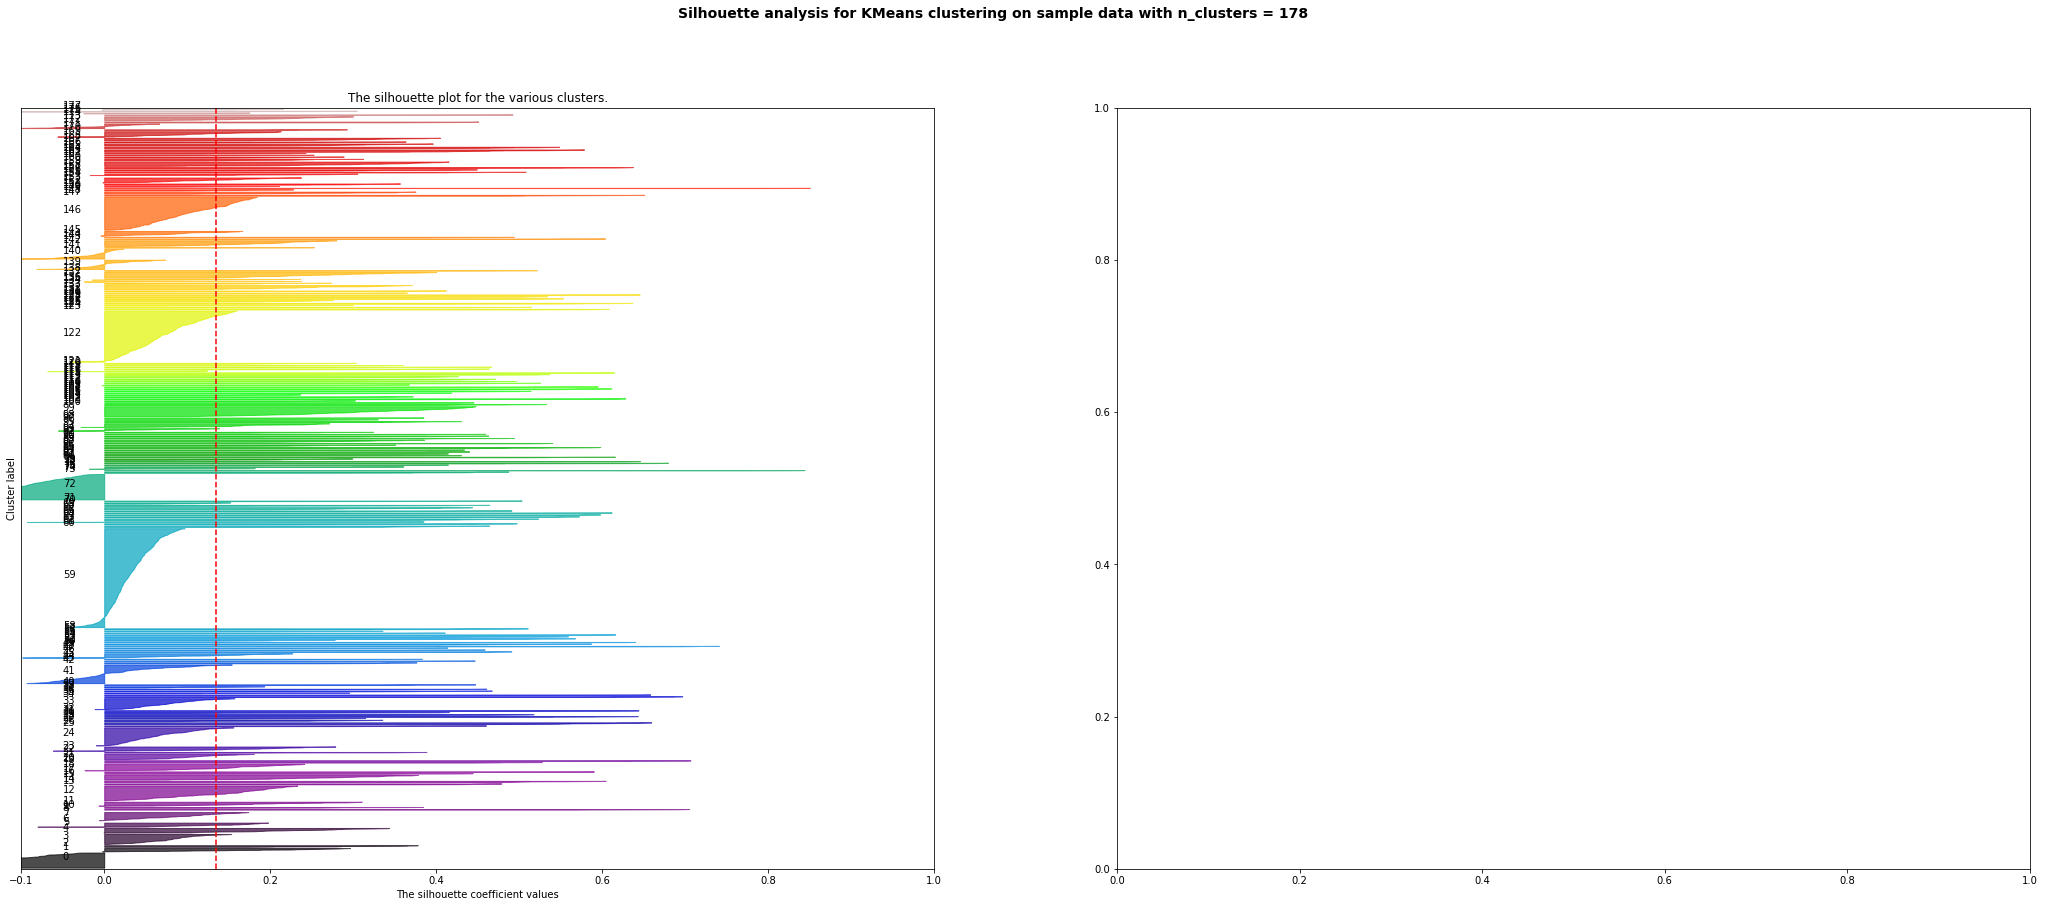

For n_clusters = 180 The average silhouette_score is : 0.121251148439


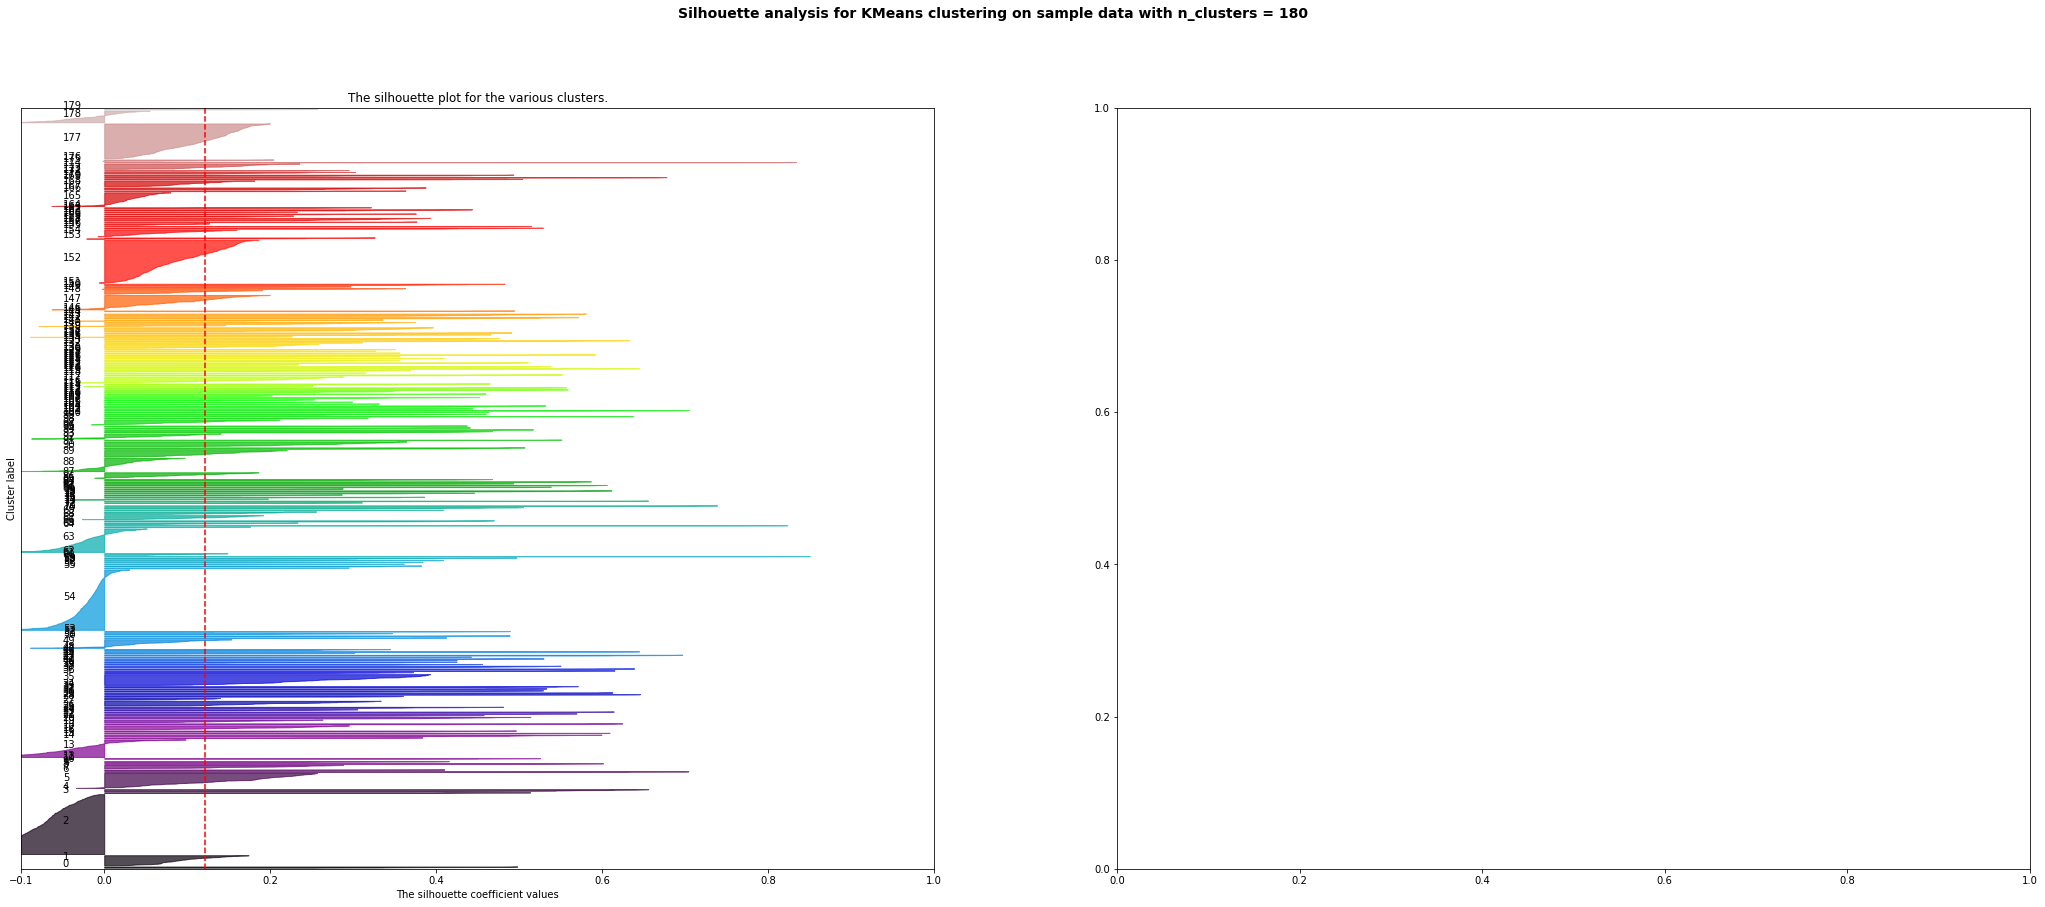

For n_clusters = 182 The average silhouette_score is : 0.14017995106


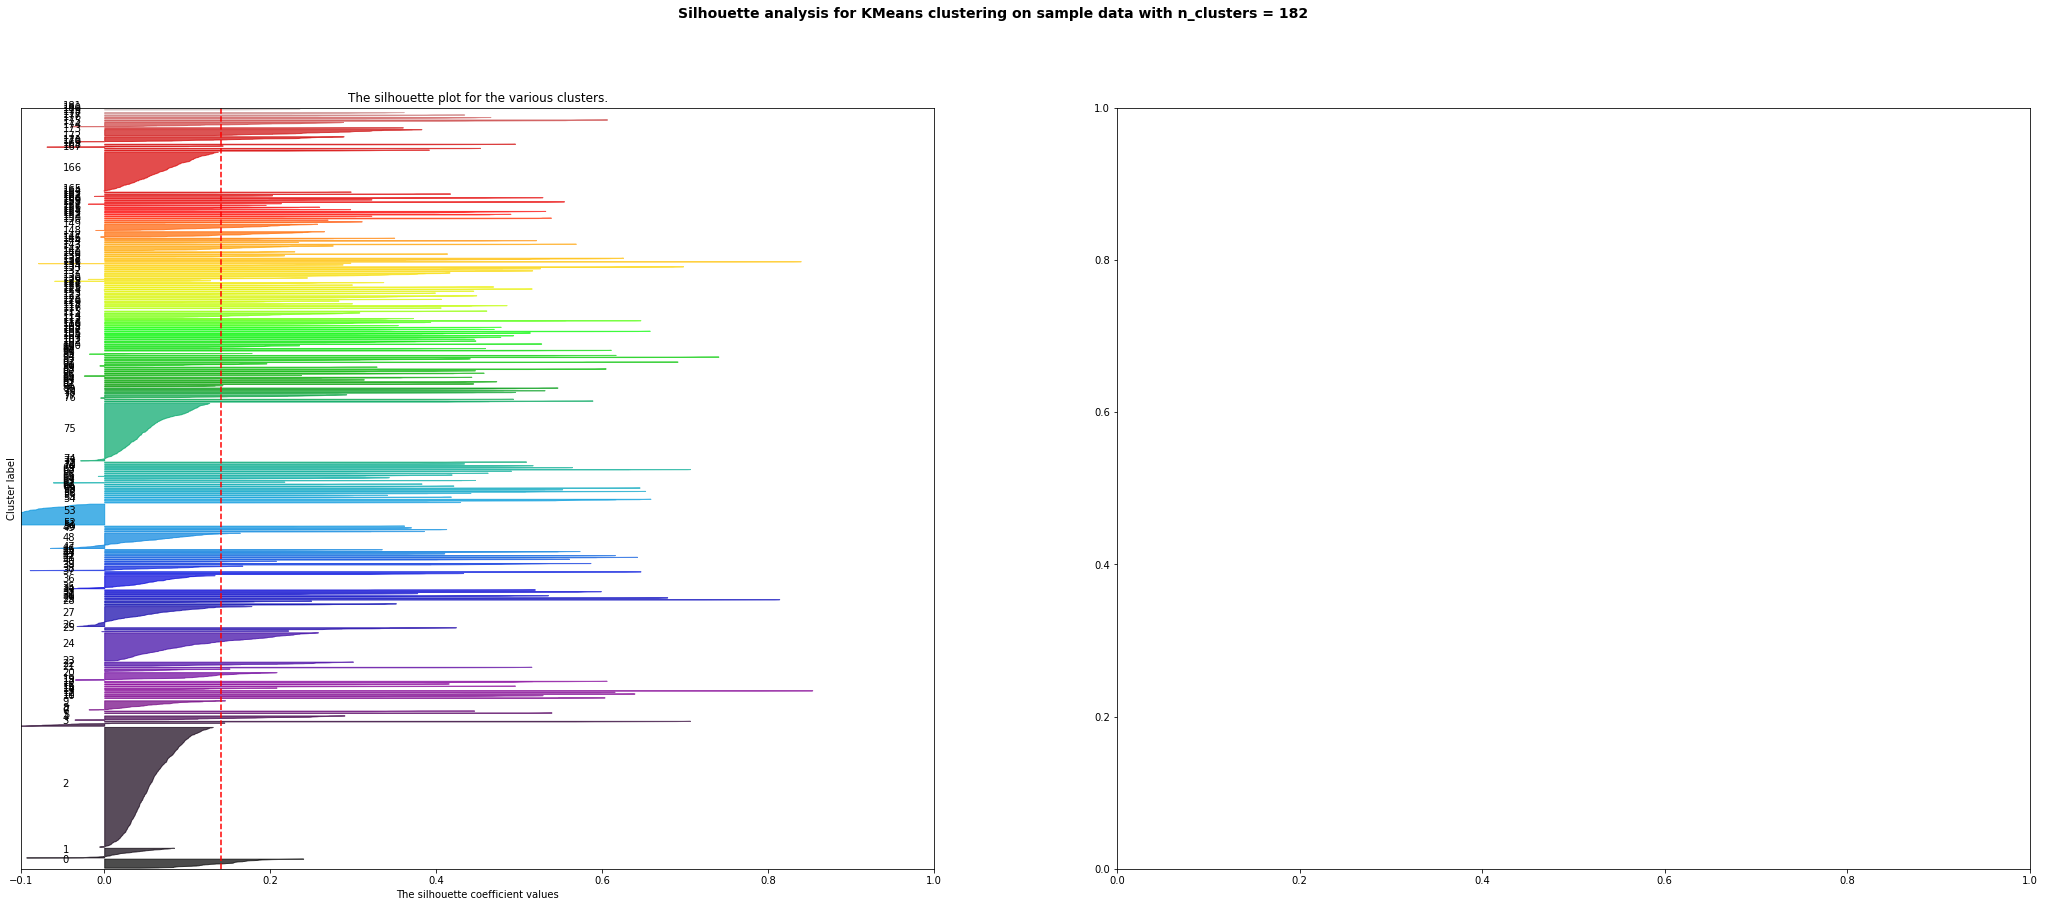

For n_clusters = 184 The average silhouette_score is : 0.128116734195


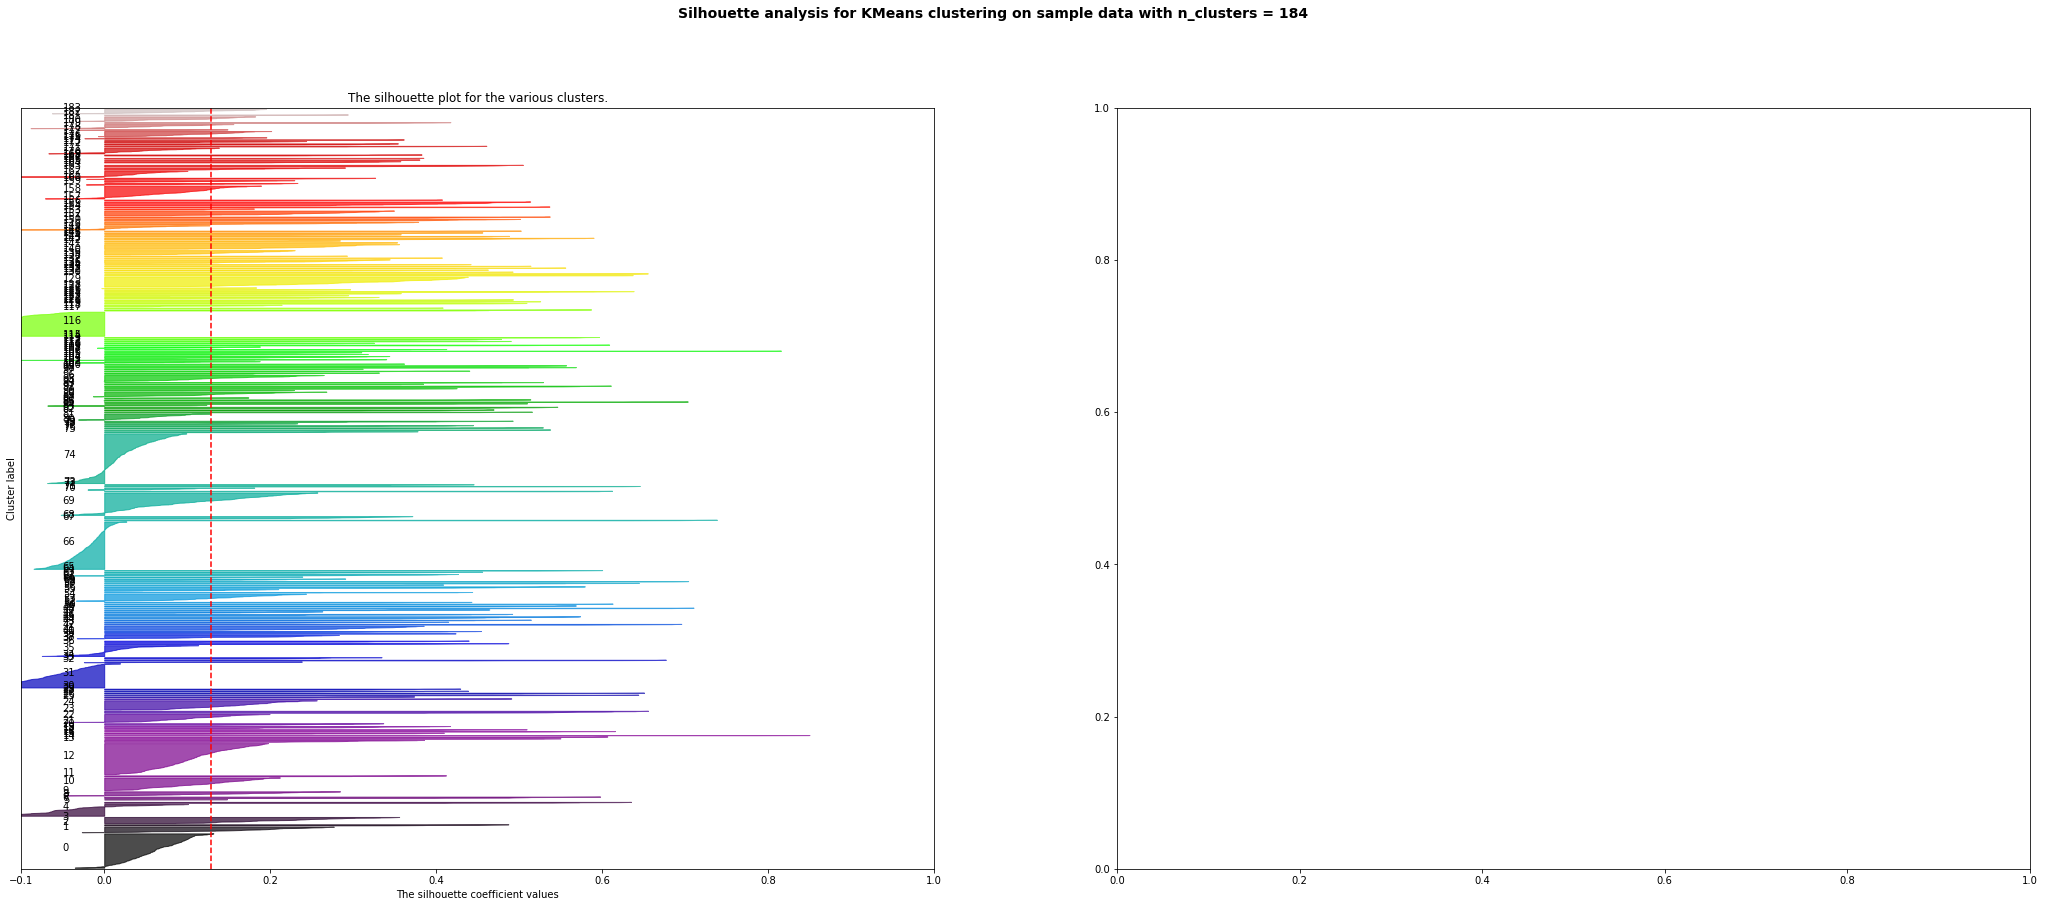

For n_clusters = 186 The average silhouette_score is : 0.131758847693


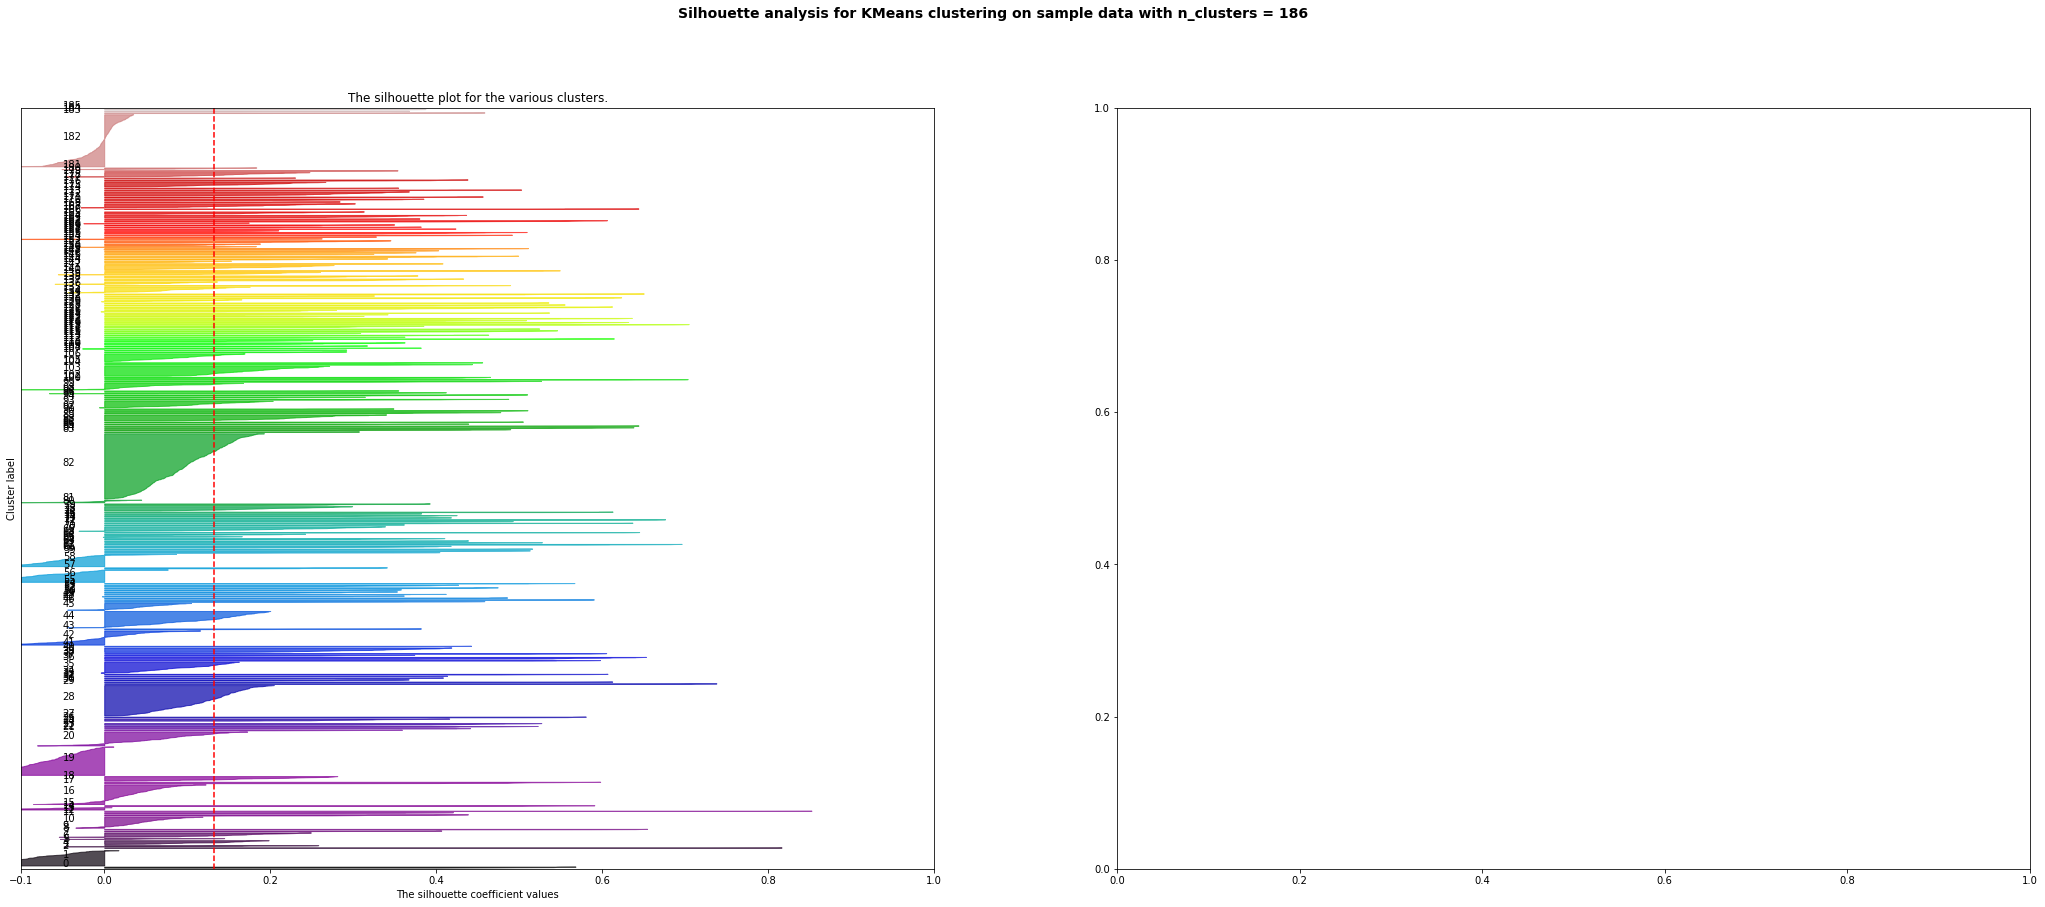

For n_clusters = 188 The average silhouette_score is : 0.137608906845


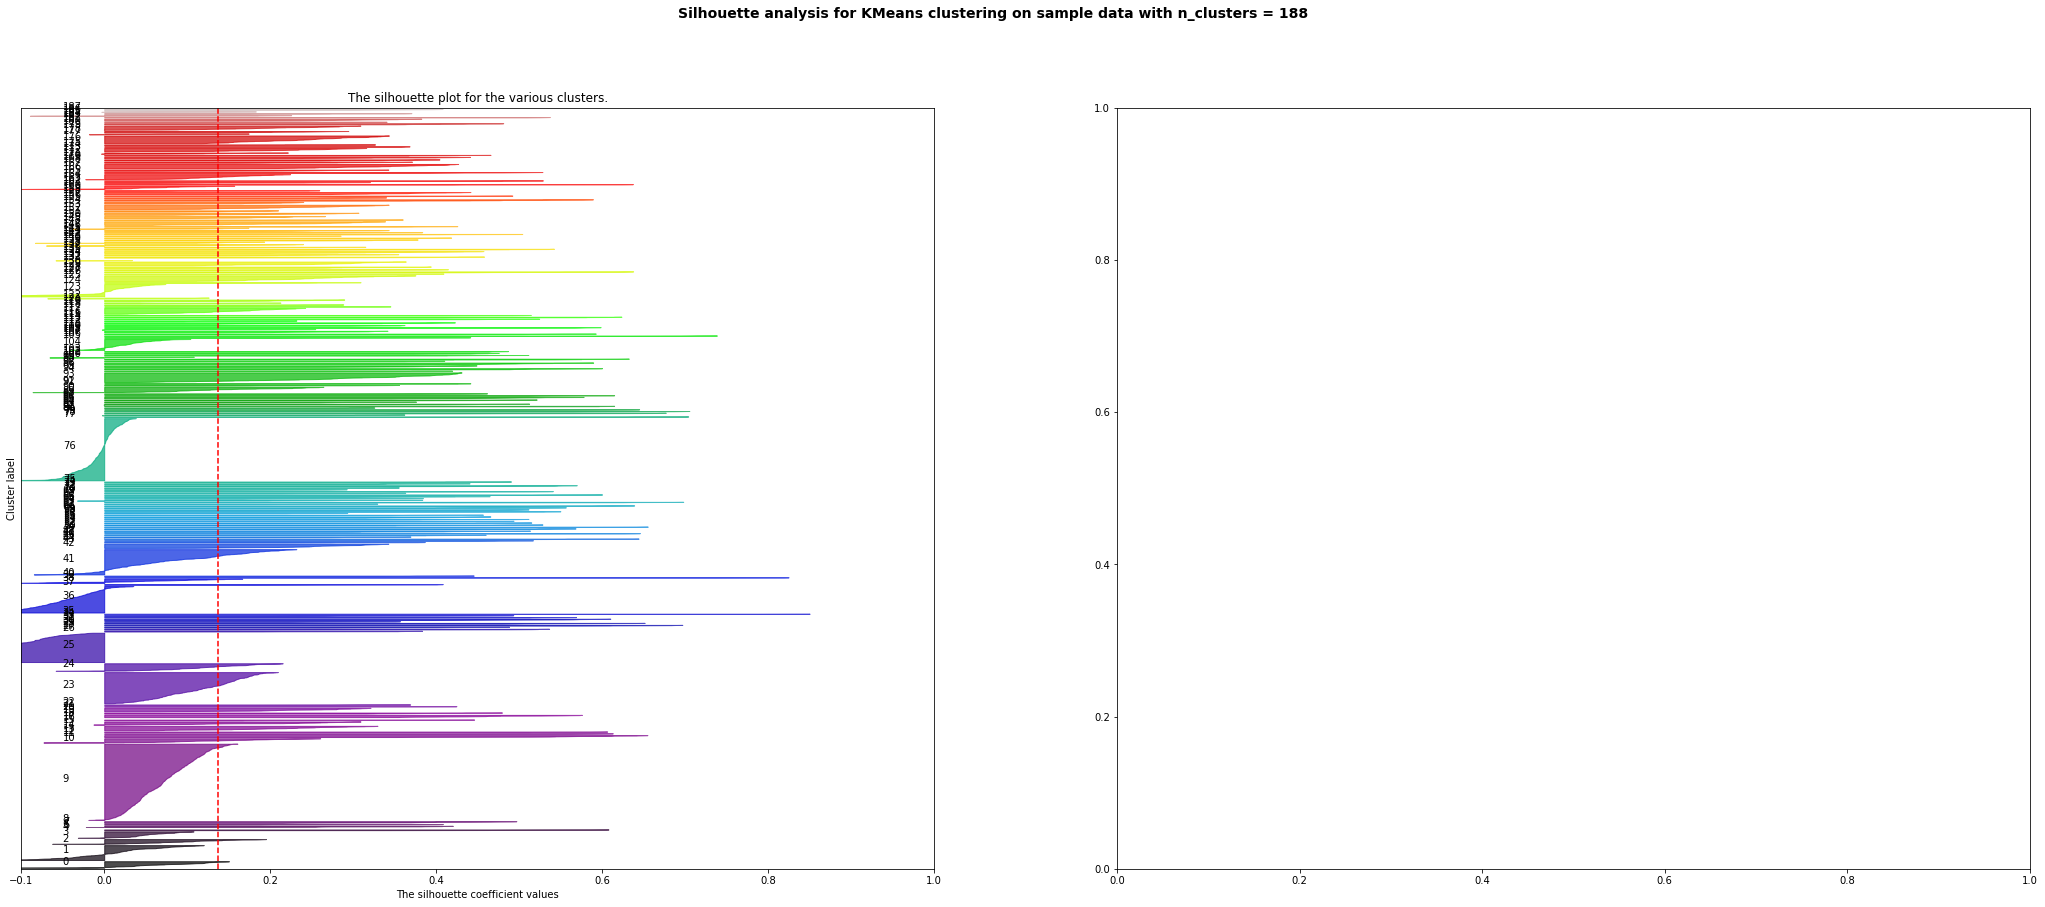

For n_clusters = 190 The average silhouette_score is : 0.135794041751


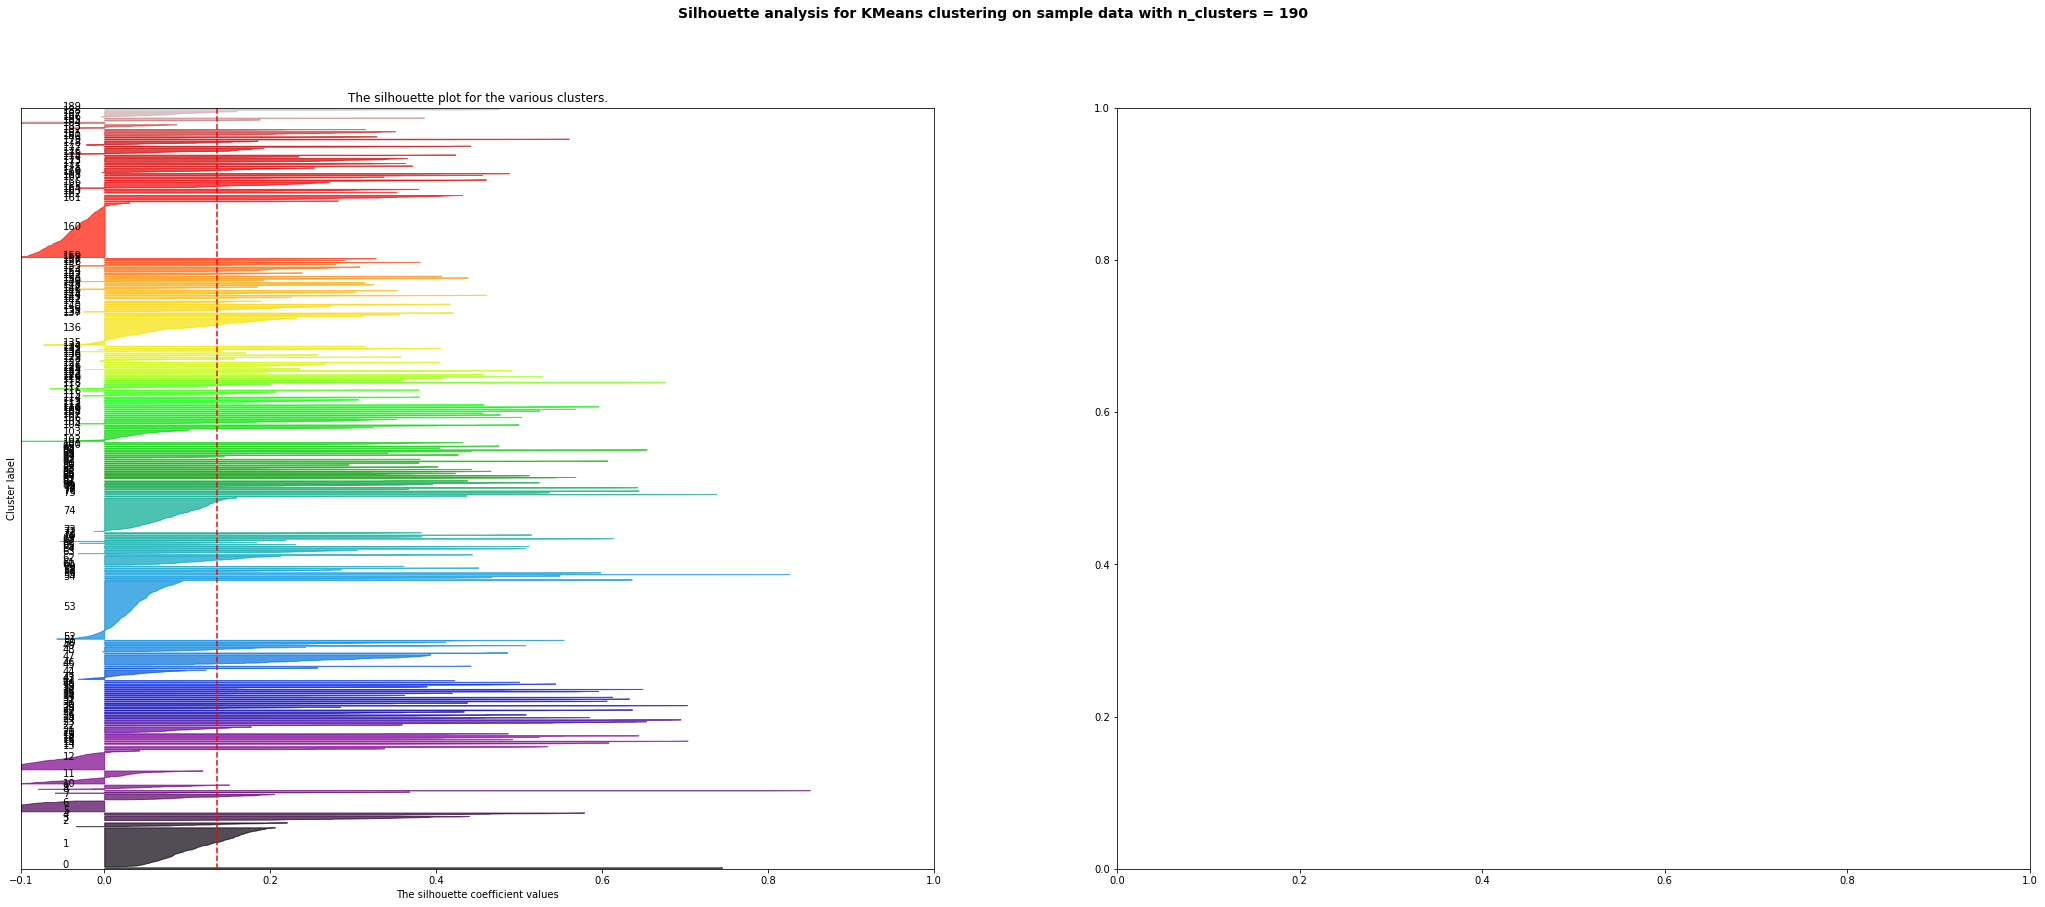

For n_clusters = 192 The average silhouette_score is : 0.149089802015


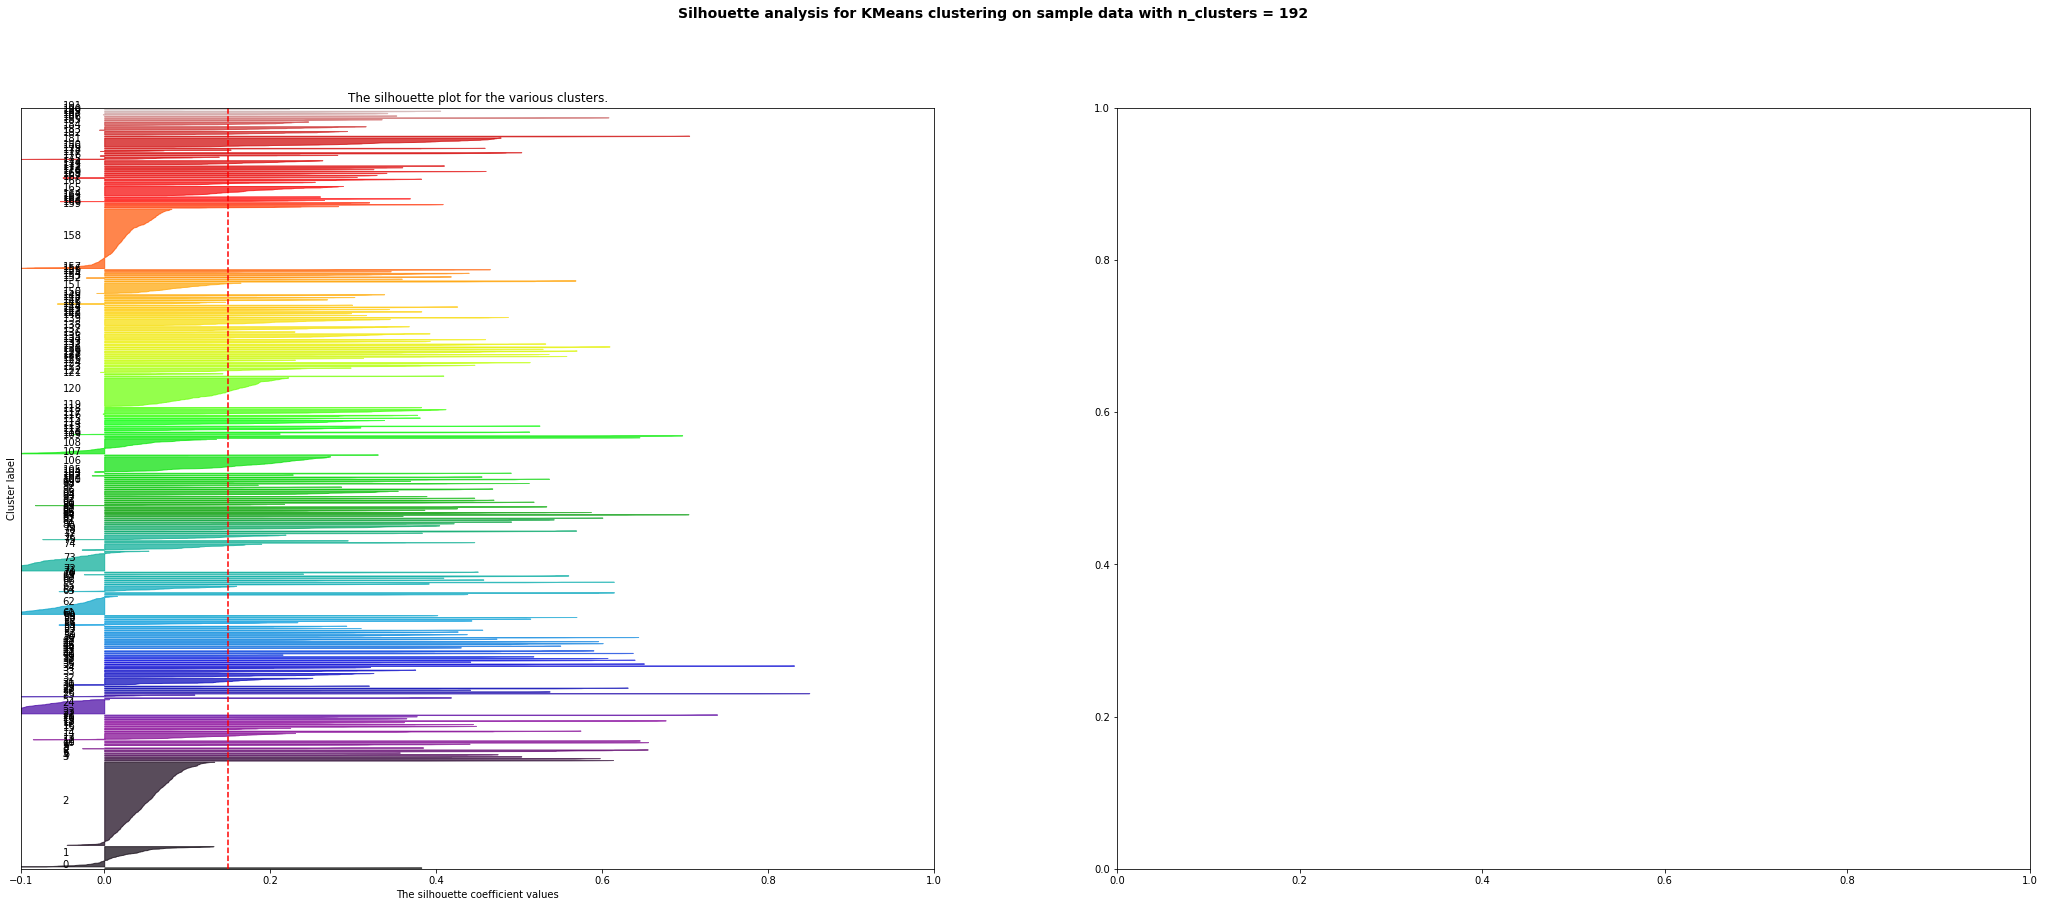

For n_clusters = 194 The average silhouette_score is : 0.149750866561


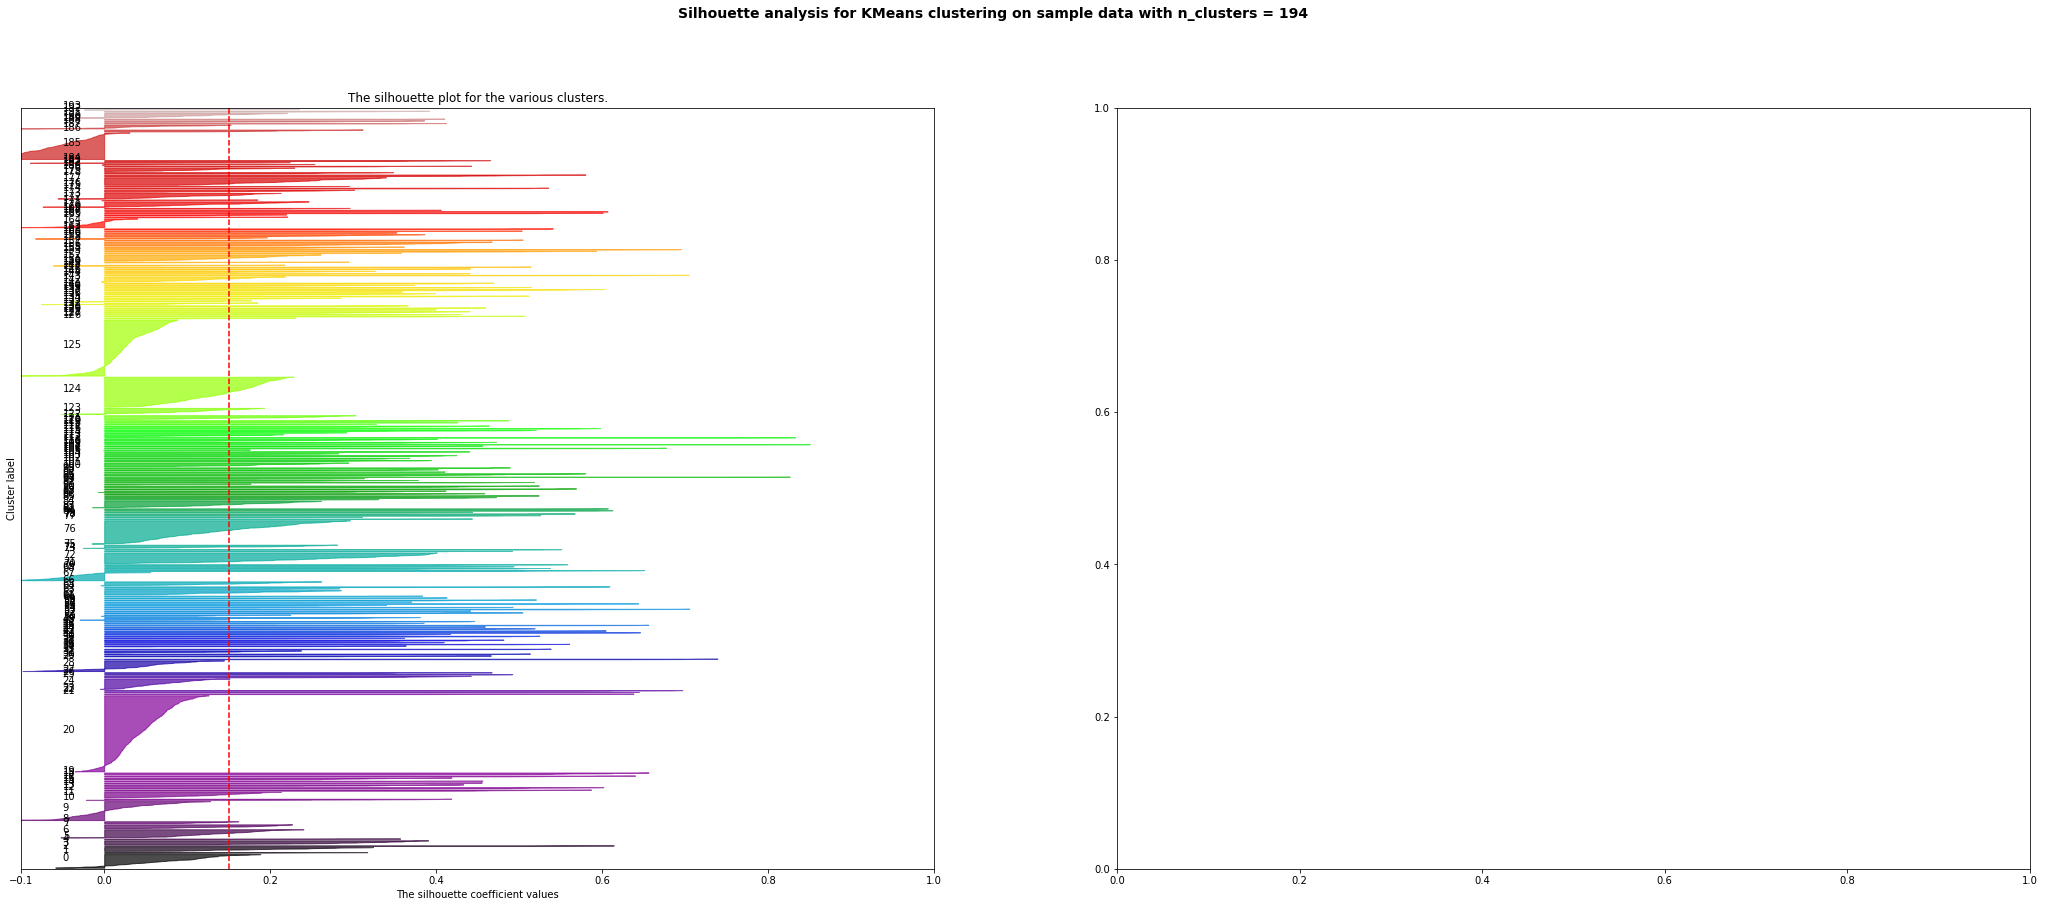

For n_clusters = 196 The average silhouette_score is : 0.153850444978


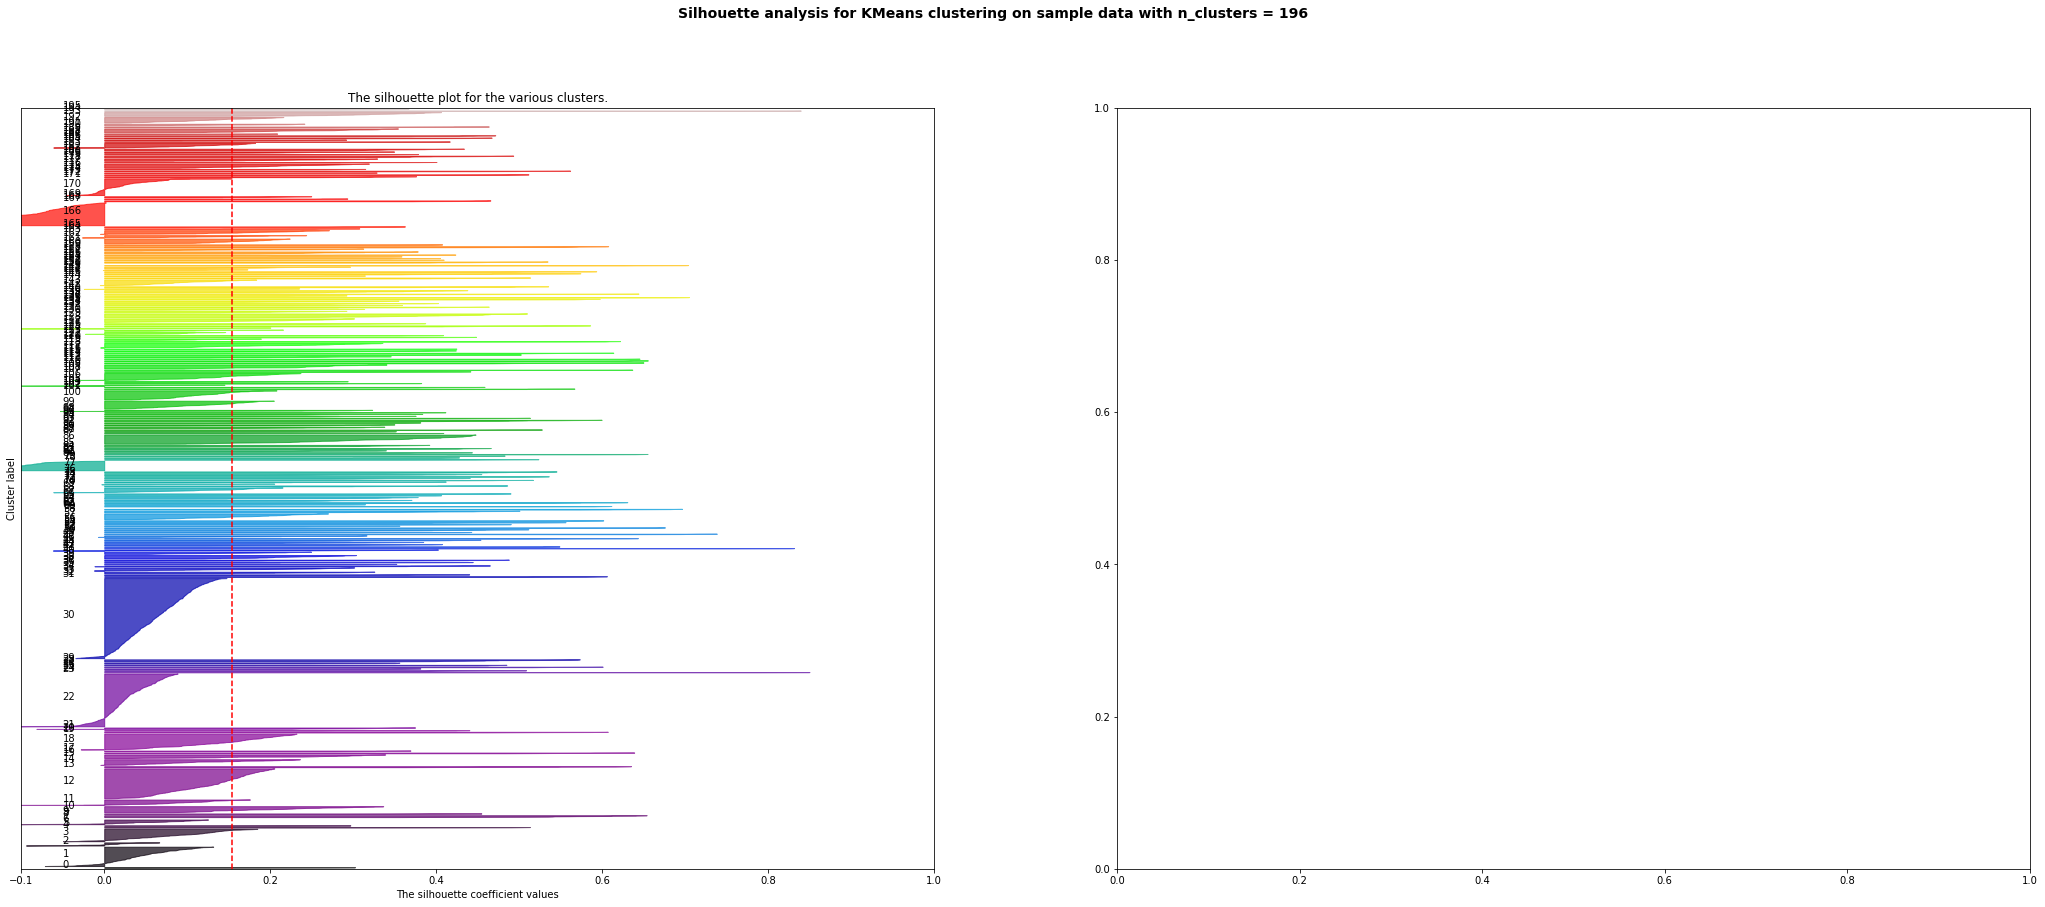

For n_clusters = 198 The average silhouette_score is : 0.146463876593


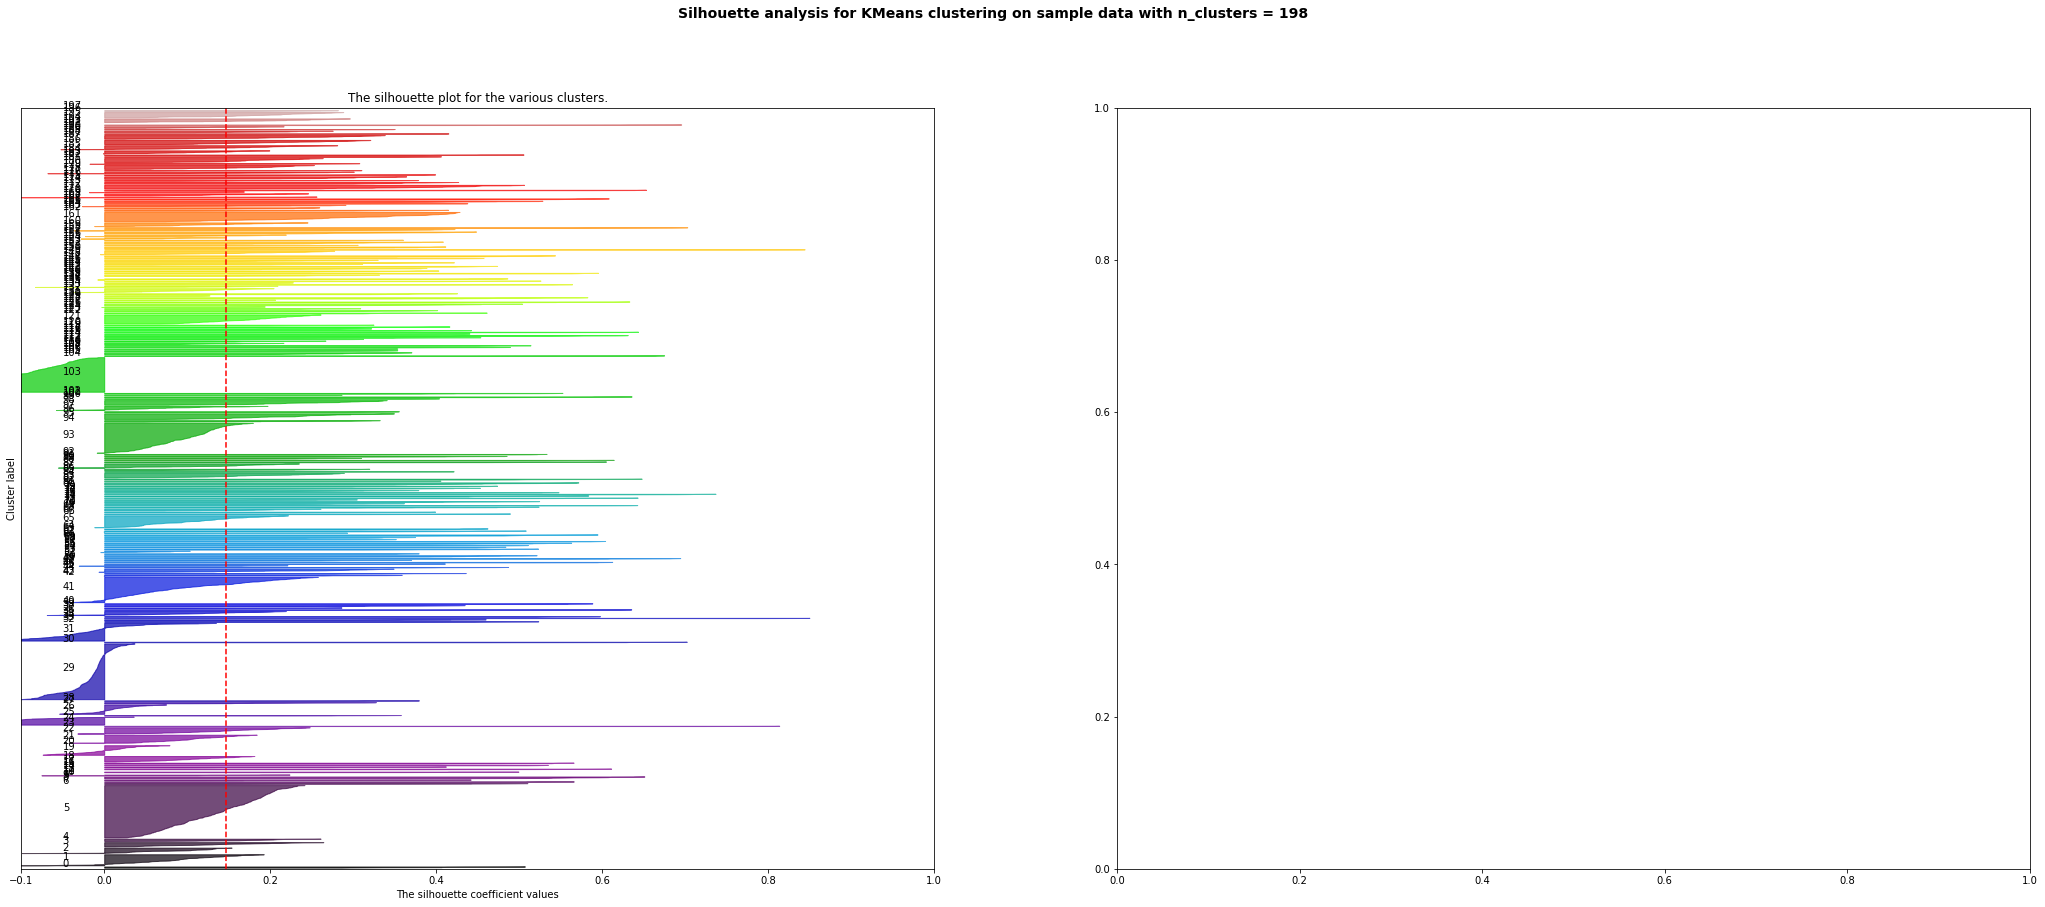

In [12]:
# C'est moche
illustration(datanum, range(150, 200, 2))

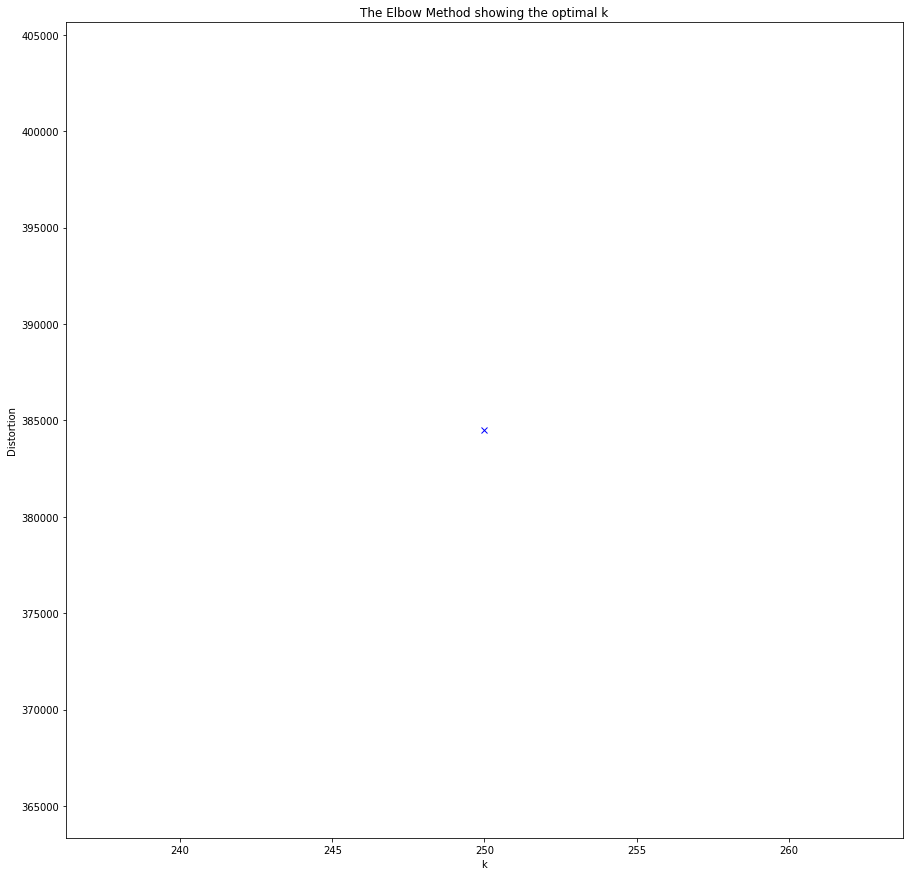

In [30]:
# Coude
del datanum['movie_title']
res2, dico2 = affichage_kmeans(datanum, 250, 250, 1)

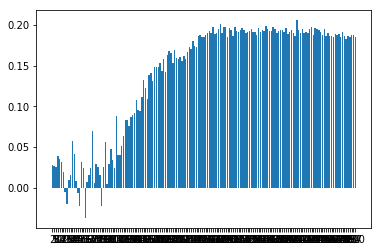

In [13]:
# PEP 448 et disponible à partir de Python 3.5
# Mix de deux dictionnaires
#z = {**res, **save}

# Autre graphique
plt.bar(range(len(res)), list(res.values()), align='center')
plt.xticks(range(len(res)), list(res.keys()))
plt.show()

In [31]:
# On remets les titres pour y voir plus clair
datanum['movie_title'] = data['movie_title']    

In [32]:
# Petits tests
liste_titres = ['Star Wars', 'Expendables', 'American Pie', 'Toy Story', 'Shrek', 'Saw', 'Rocky']
for titre in liste_titres:
    tester_moteur(datanum, titre)

#print(datanum['labels'][datanum['labels'] == 99])
#print(datanum['movie_title'][datanum['labels'] == 99])

4       128
233      66
234      66
237      66
1521    229
2031    229
2974    229
3273     44
Name: labels, dtype: int32
4       Star Wars: Episode VII - The Force Awakens    ...
233         Star Wars: Episode III - Revenge of the Sith 
234         Star Wars: Episode II - Attack of the Clones 
237            Star Wars: Episode I - The Phantom Menace 
1521          Star Wars: Episode VI - Return of the Jedi 
2031      Star Wars: Episode V - The Empire Strikes Back 
2974                  Star Wars: Episode IV - A New Hope 
3273               Star Wars: The Clone Wars             
Name: movie_title, dtype: object
296     23
313      6
431    235
Name: labels, dtype: int32
296    The Expendables 2 
313    The Expendables 3 
431      The Expendables 
Name: movie_title, dtype: object
1571    188
2871      2
Name: labels, dtype: int32
1571    American Pie 2 
2871      American Pie 
Name: movie_title, dtype: object
43       82
349     162
1572    162
Name: labels, dtype: int32
43      Toy St

In [34]:
trouver_films_nom(datanum, 'Rocky Balboa')
#trouver_films_nom(datanum, 'Toy Story')
#trouver_films_nom(datanum, 'Star Wars: Episode I - The Phantom Menace')

621                    Escape Plan 
718                           Antz 
810                      Rambo III 
850                   Tango & Cash 
882                    Eye See You 
885             Bullet to the Head 
1051                   First Blood 
1088                The Specialist 
1131    Rambo: First Blood Part II 
1281                    Get Carter 
1355                         Creed 
2001                  Rocky Balboa 
2995                      F.I.S.T. 
3666                    Nighthawks 
4432                         Rocky 
4730               Death Race 2000 
Name: movie_title, dtype: object


In [23]:
histogramme(datanum, 'labels')